In [1]:
from poincare_maps import *
import scanpy.api as sc
import pandas as pd
import numpy as np
from coldict import *

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

... storing 'labels' as categorical


         Falling back to preprocessing with `sc.pp.pca` and default params.
saving figure to file predictions/Olsson_cut/paga.pdf


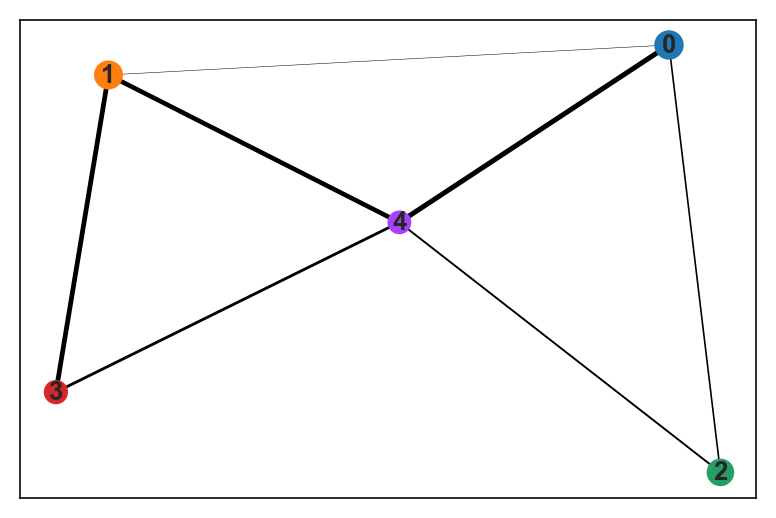

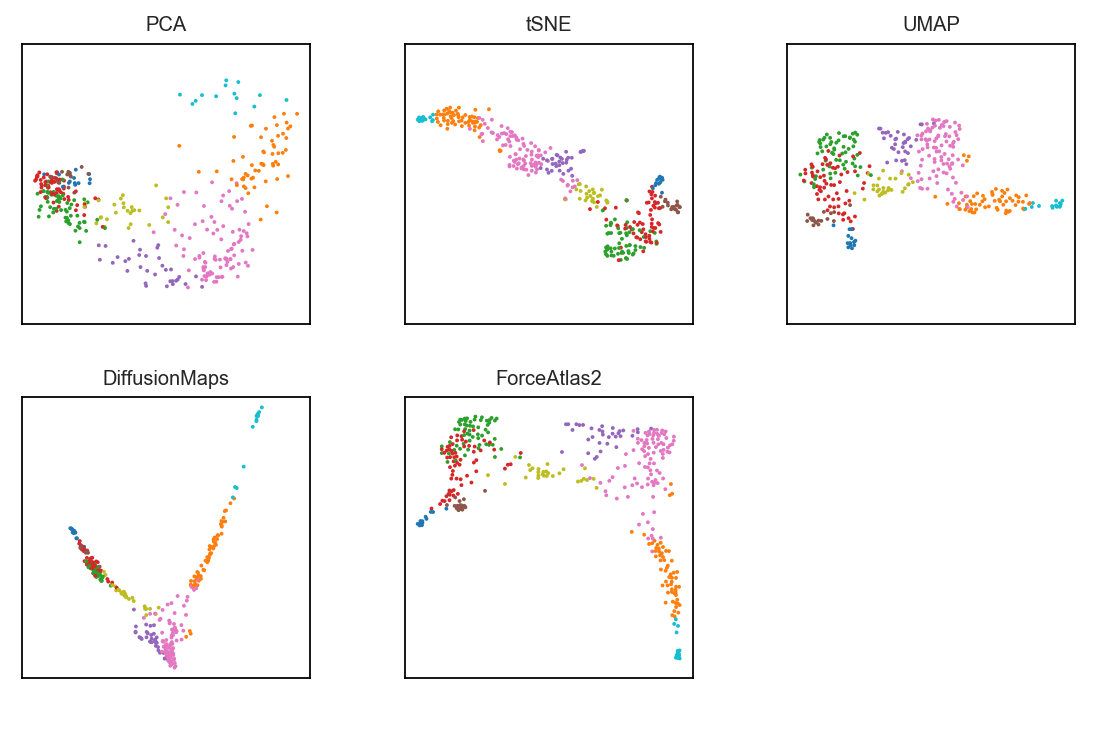

In [110]:
model_name = 'Olsson'
col_dict = None

fin = f"datasets/{model_name}"
fout = f"predictions/{model_name}"

data, true_labels, col_names = read_data(fin, normalize=False, n_pca=100)
col_names = [f'PC{i}' for i in range(100)]
adata, iroot, louvain_labels = init_scanpy(data, col_names, 'HSPC-1', true_labels, fout, k=15)
plotBenchamrks(adata, true_labels, f"predictions/{model_name}", coldict=col_dict)


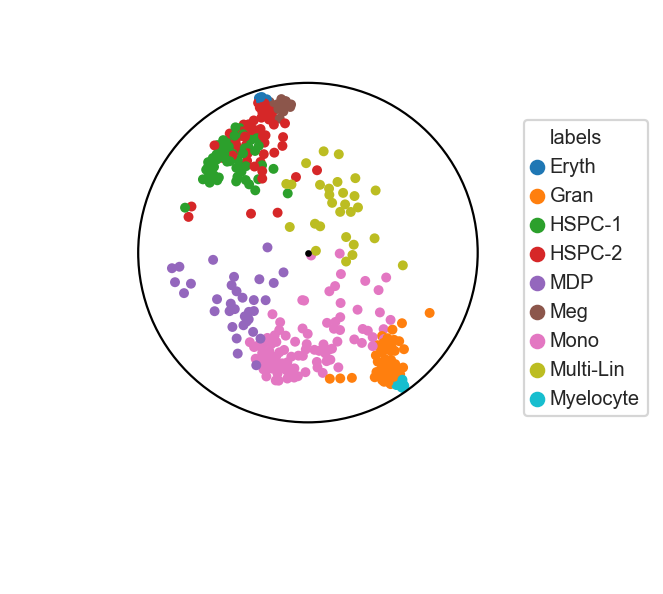

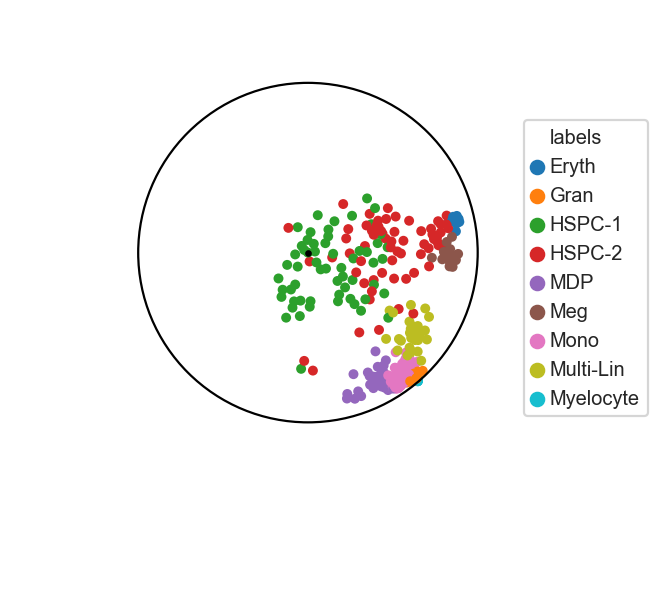

In [88]:
fsetting = 'Olsson_MFIsym15_klSym_sigma=1.00_gamma=2.00_lr=0.03_lrm=1.00_pca=20_epochs=10000_batchsize=47_connected'
input_file = f"results/{fsetting}"
poincare_coord = pd.read_csv(input_file + '.csv', sep=',', header=None).values
model = PoincareMaps(poincare_coord)
model.plot('ori', labels=true_labels, file_name=fout + '_ori', 
           title_name='Poincaré map', zoom=None, bbox=(1.1, 0.8), coldict=col_dict)
model.iroot = iroot
model.rotate()
model.plot('rot', labels=true_labels, file_name=fout + '_rotated', 
           title_name='clusters', zoom=None, show=True, bbox=(1.1, 0.8), coldict=col_dict)

In [21]:
title_name_dict = {'X_pca': 'PCA',
                   'X_tsne': 'tSNE',
                   'X_umap': 'UMAP',
                   'X_diffmap': 'DiffusionMaps',
                   'X_draw_graph_fa': 'ForceAtlas2'}

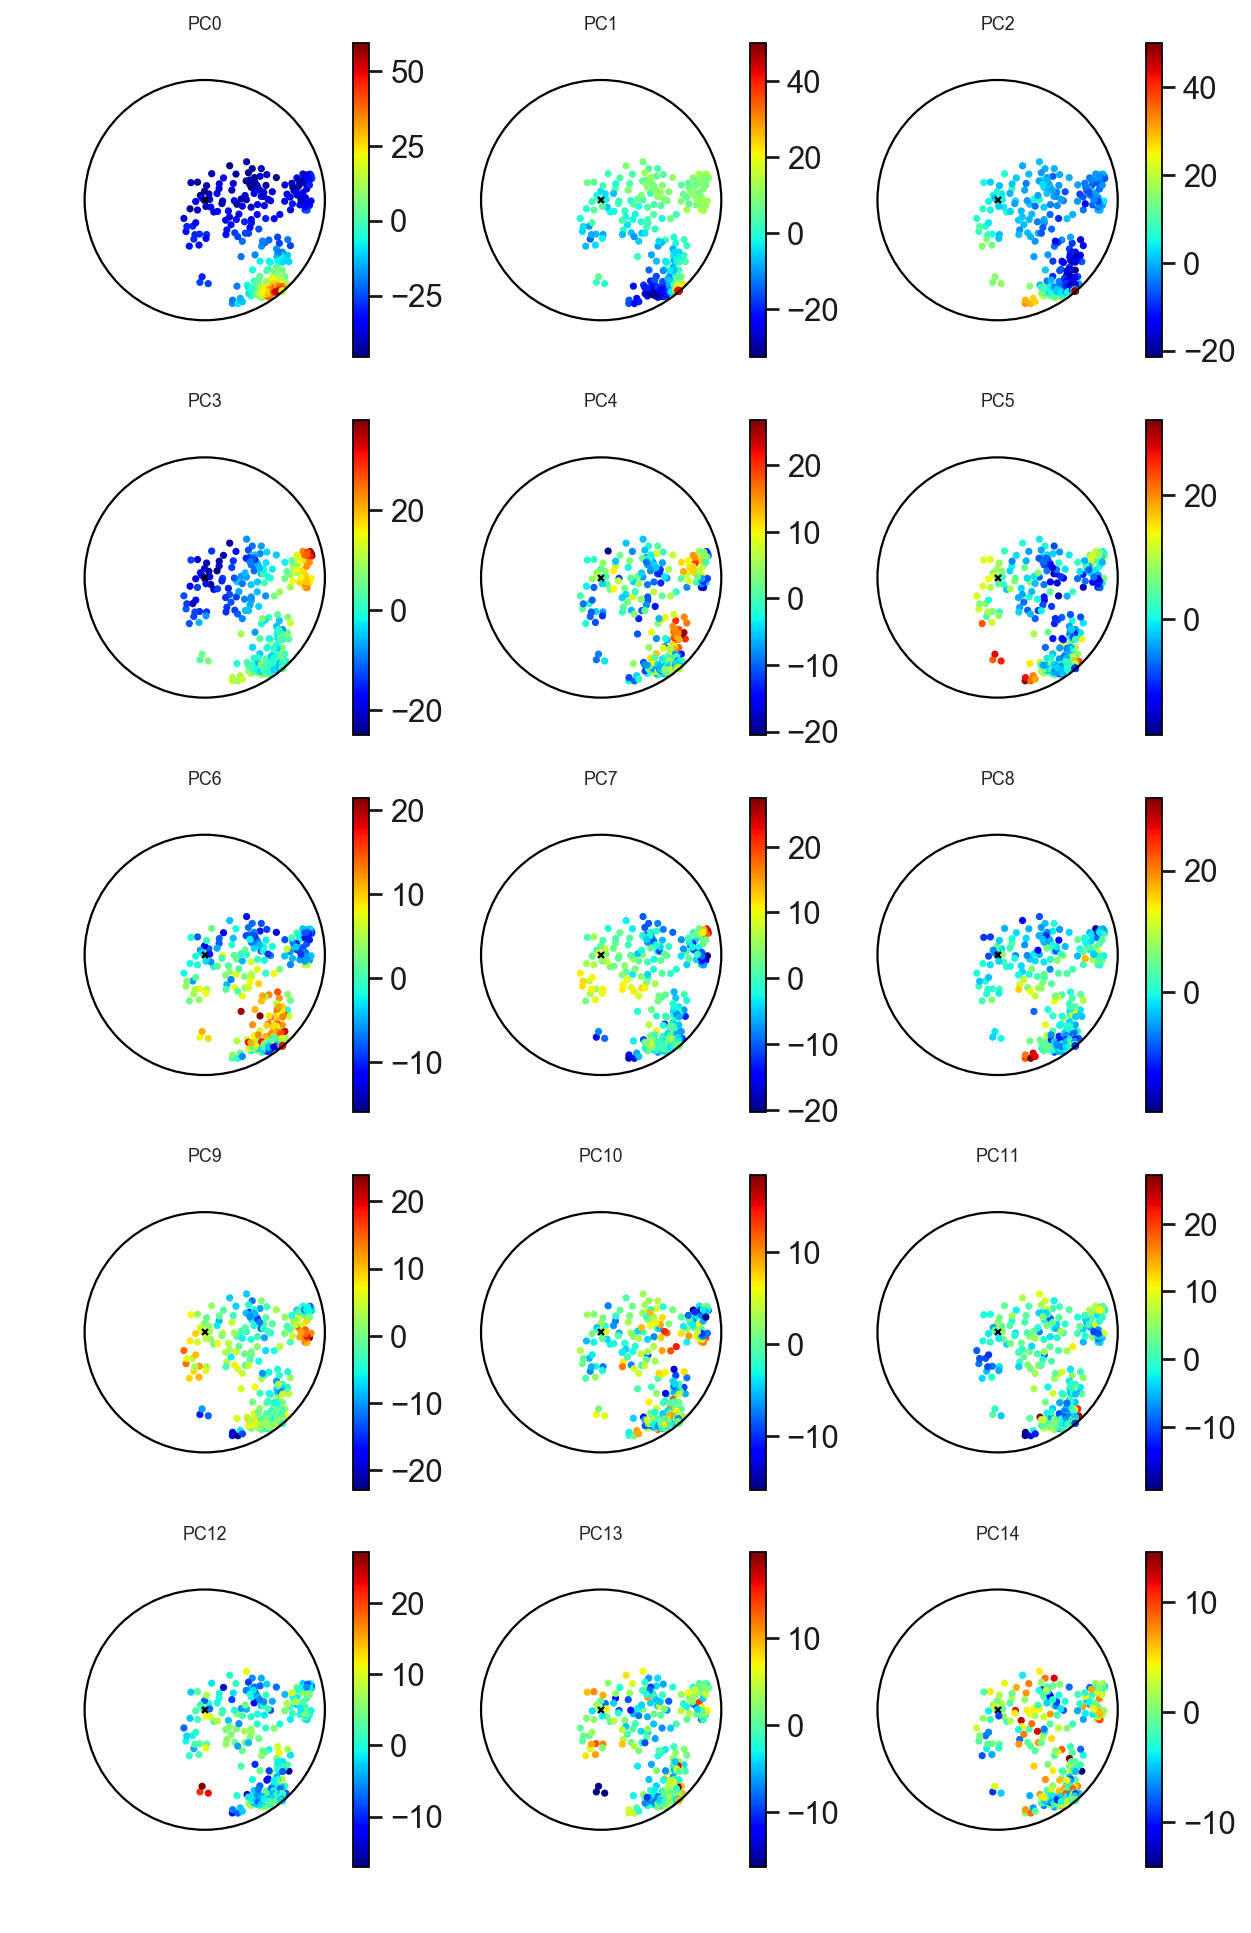

In [112]:
ncl = 15
model.plot_markers(data[:, :ncl], col_names[:ncl], file_name=None, pm_type='rot')

In [108]:
s = np.std(data, axis=0)
m = np.mean(data, axis=0)

In [113]:
df = pd.DataFrame(data, columns=col_names)
df['labels'] = true_labels
df.to_csv(f"datasets/{model_name}100.csv", index=False, sep=',')

In [114]:
# save to file
class_to_remove = 'HSPC-2'
idx_keep = np.where(true_labels != class_to_remove)[0]

df = pd.DataFrame(data[idx_keep, :], columns=col_names)
df['labels'] = true_labels[idx_keep]

df.to_csv(f"datasets/{model_name}100_wo_HSPC2.csv", index=False, sep=',')

In [115]:
col_dict = dict(zip(true_labels_list, colors_palette[:len(true_labels_list)]))

In [116]:
data_cut= data[idx_keep, :]
true_labels_cut = true_labels[idx_keep]

... storing 'labels' as categorical


         Falling back to preprocessing with `sc.pp.pca` and default params.
saving figure to file predictions/Olsson/paga.pdf


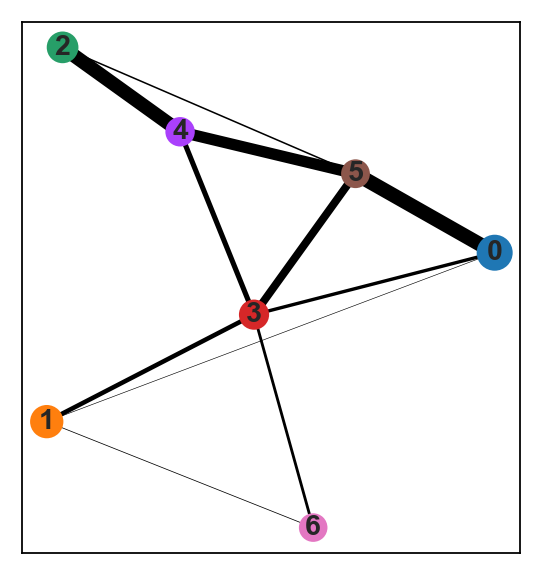

In [117]:
adata_cut, iroot_cut, louvain_labels_cut = init_scanpy(data_cut, col_names, 
                                                       'HSPC-1', true_labels_cut, fout+'_cut', k=15)


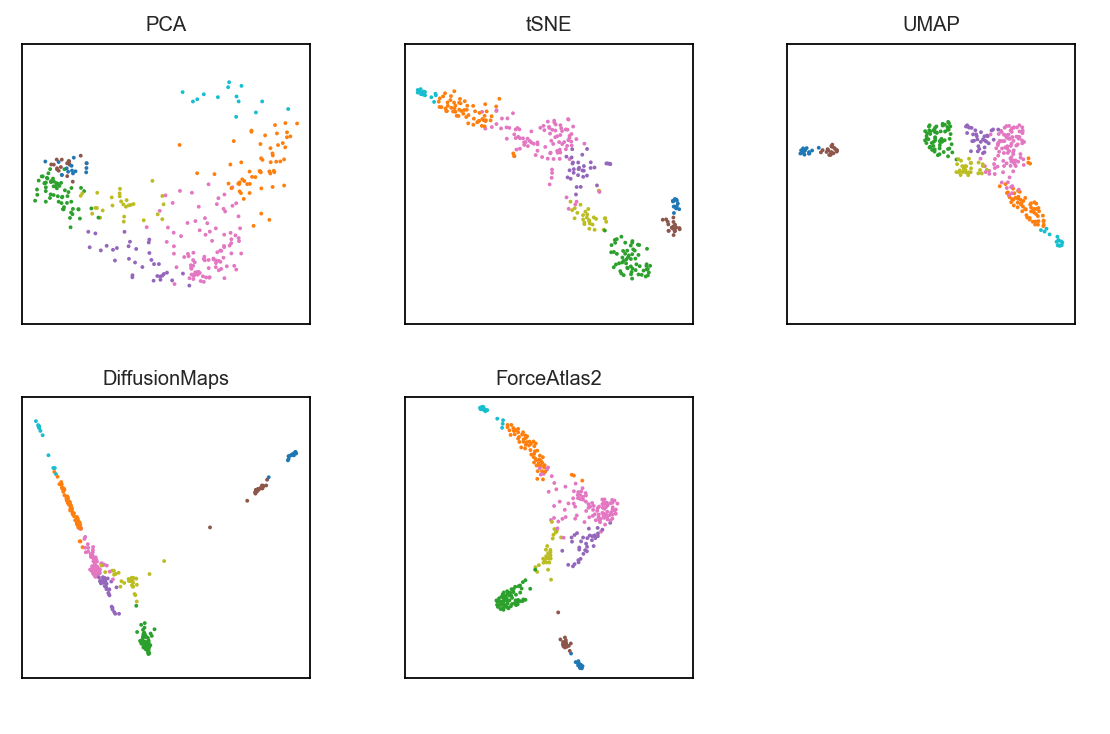

In [118]:
plotBenchamrks(adata_cut, true_labels_cut, f"predictions/{model_name}100_cut", coldict=col_dict)


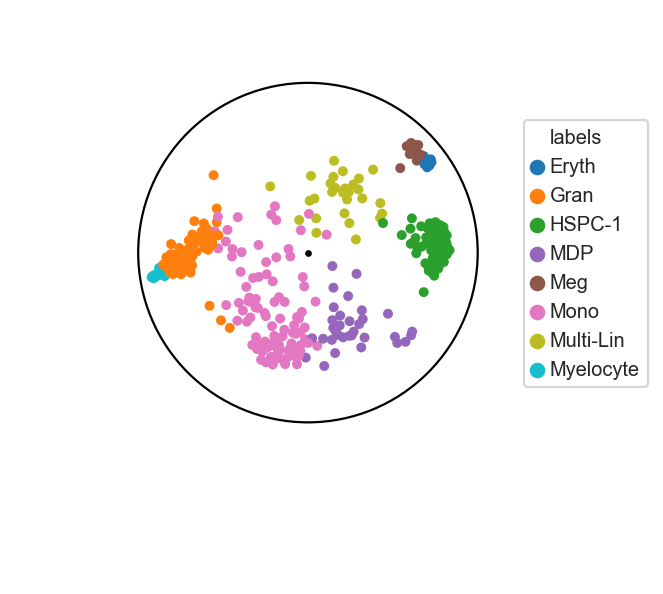

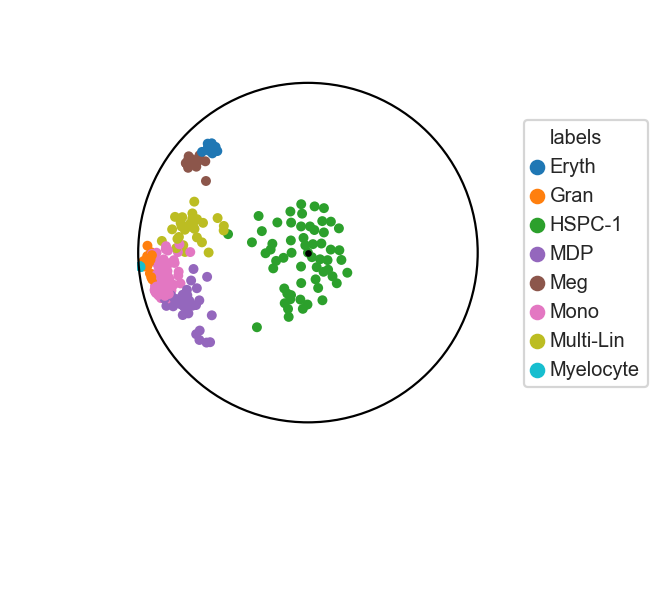

In [119]:
fsetting = 'Olsson100_wo_HSPC2_MFIsym15_klSym_sigma=1.00_gamma=2.00_lr=0.02_lrm=1.00_pca=20_epochs=3000_batchsize=39_connected'
input_file = f"results/{fsetting}"
poincare_coord = pd.read_csv(input_file + '.csv', sep=',', header=None).values
model_cut = PoincareMaps(poincare_coord)
model_cut.plot('ori', labels=true_labels_cut, file_name=fout + '_ori_cut', 
           title_name='Poincaré map', zoom=None, bbox=(1.1, 0.8), coldict=col_dict)
model_cut.iroot = iroot_cut
model_cut.rotate()
model_cut.plot('rot', labels=true_labels_cut, file_name=fout + '_rotated_cut', 
           title_name='clusters', zoom=None, show=True, bbox=(1.1, 0.8), coldict=col_dict)

In [120]:
for method in ['X_draw_graph_fa', 'X_umap']:
    df = pd.DataFrame(adata_cut.obsm[method], columns=['x1', 'x2'])
    fout_pred = f"predictions/{model_name}100_wo_HSPC2_{title_name_dict[method]}.csv"
    df.to_csv(fout_pred, index=False, sep=',')

In [121]:
df = pd.DataFrame(model_cut.coordinates_rotated, columns=['x1', 'x2'])
fout_pred = f"predictions/{model_name}100_wo_HSPC2_PM.csv"
df.to_csv(fout_pred, index=False, sep=',')

As the next step we need to run the following:

python3 ./autoencoder.py --model Olsson --lr 1e-3 --epochs 500 --wd 1e-3

# Paul

... storing 'labels' as categorical


saving figure to file predictions/Paul/paga.pdf


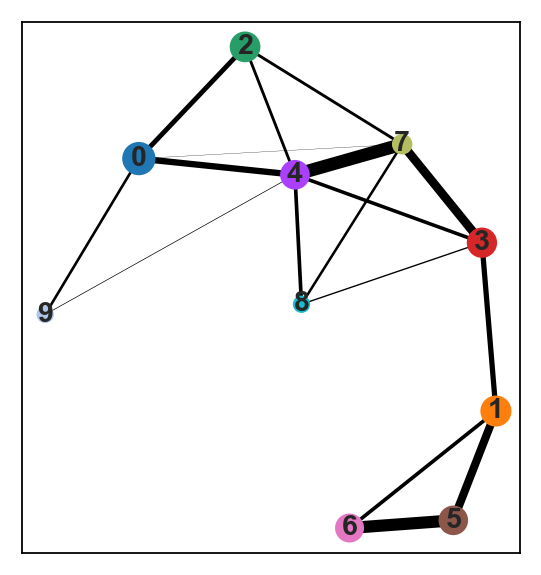

In [3]:
model_name = 'Paul'
col_dict = None

fin = f"datasets/{model_name}"
fout = f"predictions/{model_name}"

data, true_labels, col_names = read_data(fin, normalize=False, n_pca=0)
adata, iroot, louvain_labels = init_scanpy(data, col_names, 'root', true_labels, fout, k=15, n_pcs=20)

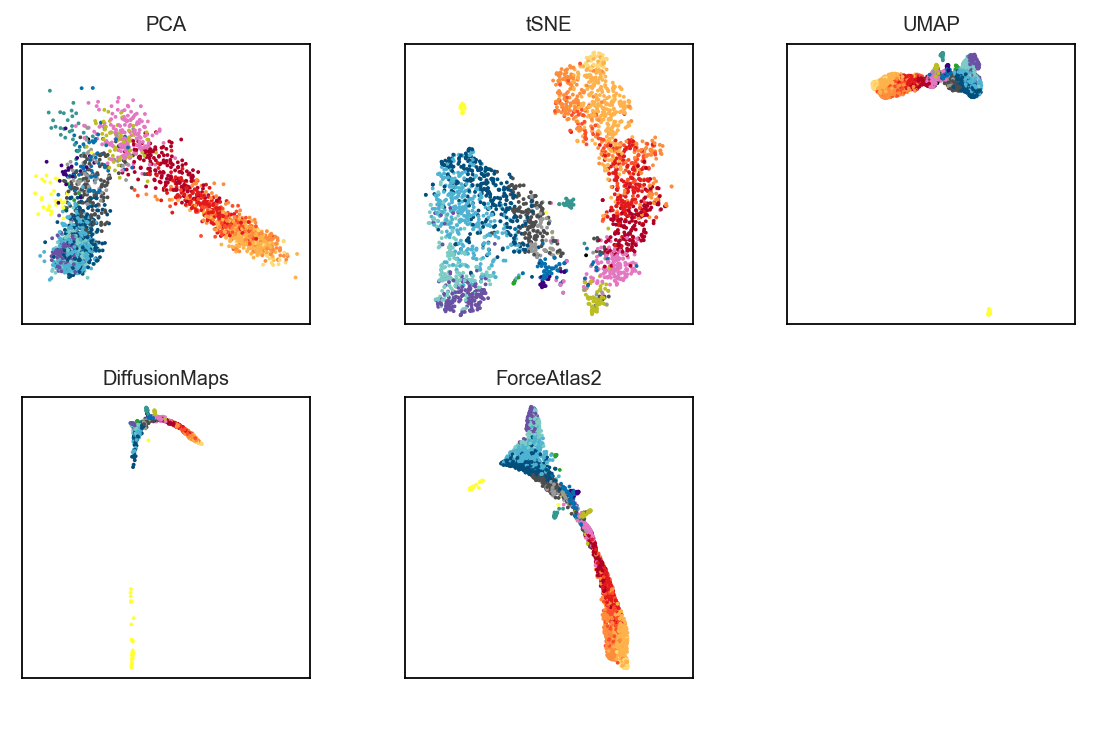

In [4]:
plotBenchamrks(adata, true_labels, f"predictions/{model_name}", coldict=color_dict)

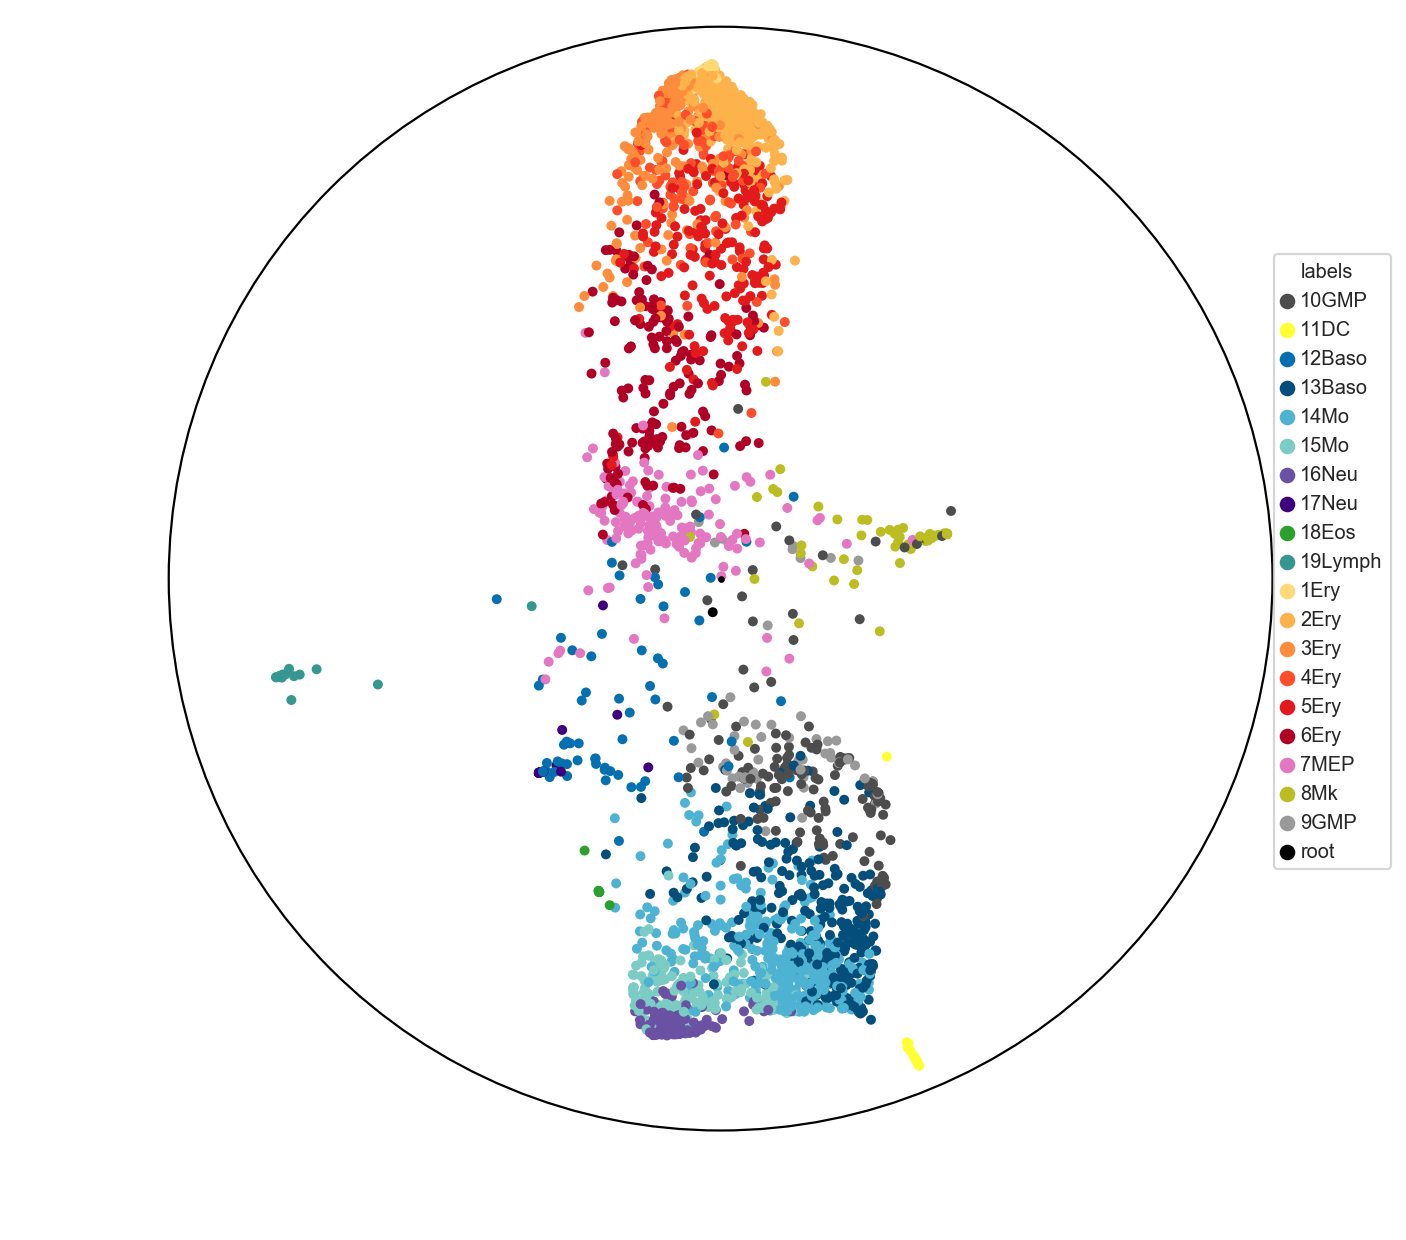

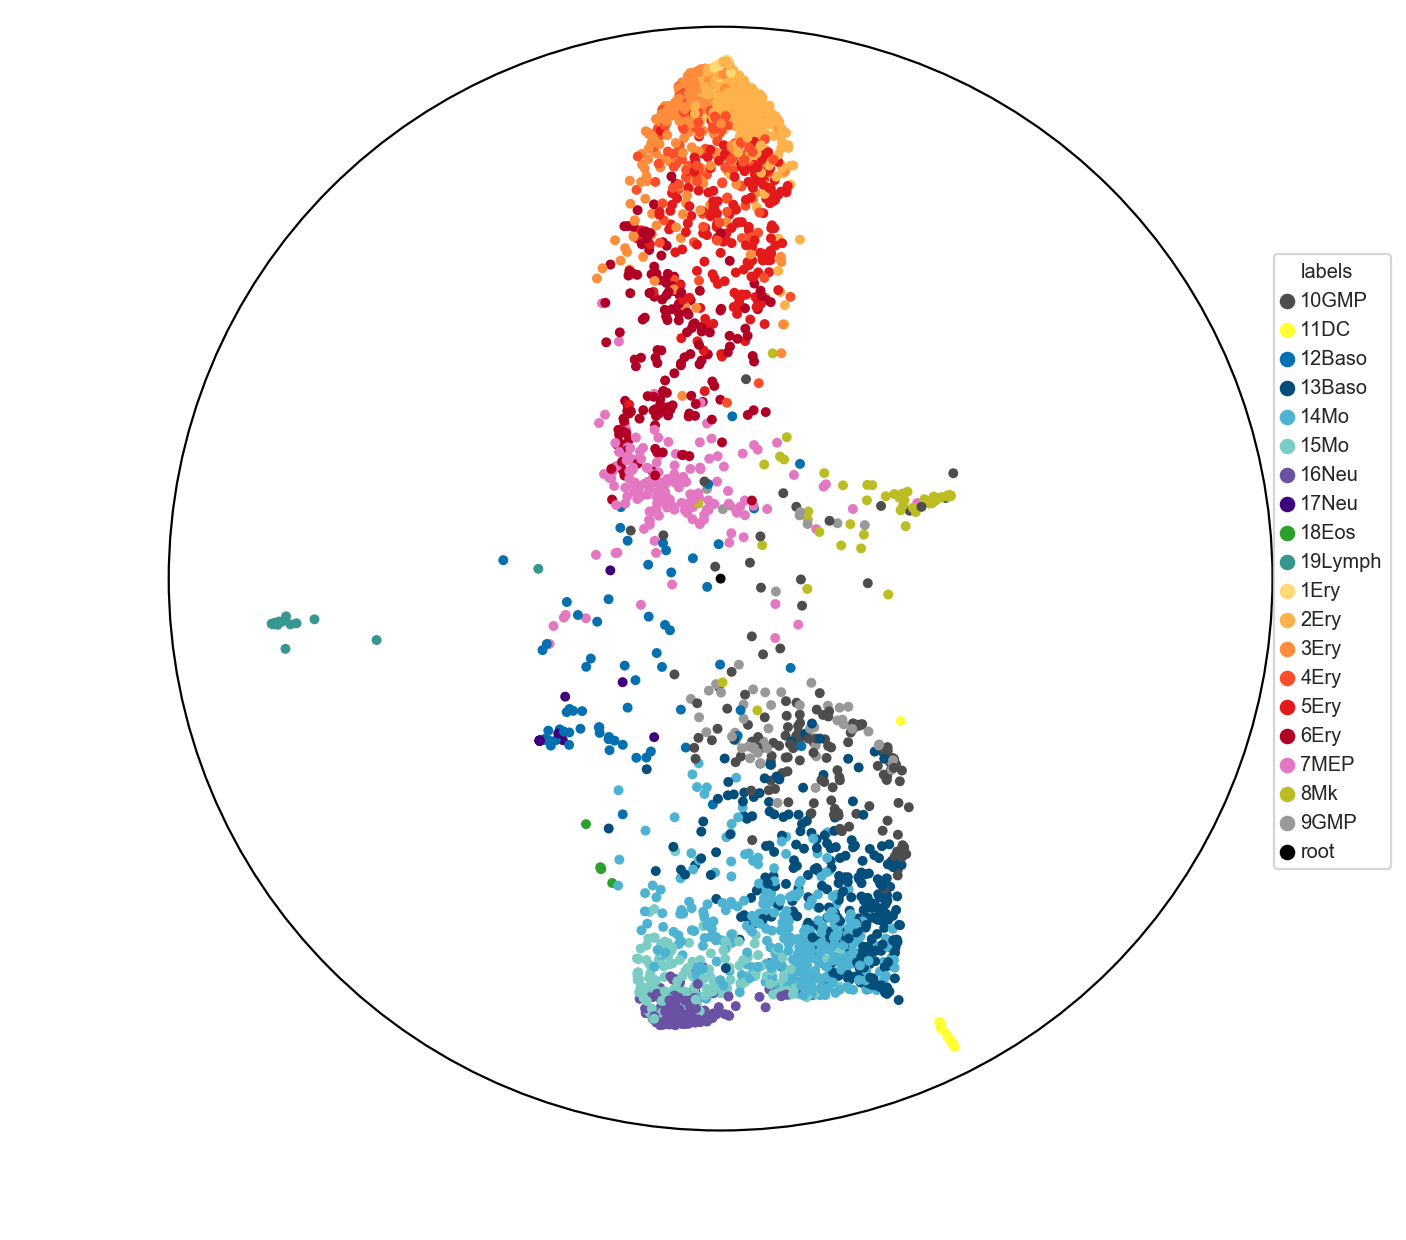

In [5]:
fsetting = 'Paul_MFIsym15_klSym_sigma=2.00_gamma=2.00_lr=0.21_lrm=1.00_pca=20_epochs=10000_batchsize=341_connected'
input_file = f"results/{fsetting}"
poincare_coord = pd.read_csv(input_file + '.csv', sep=',', header=None).values
model = PoincareMaps(poincare_coord)
model.plot('ori', labels=true_labels, file_name=fout + '_ori', 
           title_name='Poincaré map', zoom=None, bbox=(1.1, 0.8), coldict=color_dict, d1=4.5*2, d2=4.0*2)
model.iroot = iroot
model.rotate()
model.plot('rot', labels=true_labels, file_name=fout + '_rotated', 
           title_name='clusters', zoom=None, show=True, bbox=(1.1, 0.8), coldict=color_dict, d1=4.5*2, d2=4.0*2)

In [6]:
# save to file
# class_to_remove = '7MEP'
# class_to_remove = 'proj'
idx_keep = np.where( 
                    (true_labels != '6Ery') &
                    (true_labels != '5Ery') &
                    (true_labels != '7MEP'))[0]

# (true_labels != '10GMP') & 
#                     (true_labels != '9GMP') &
class_to_remove = 'ery'
# idx_keep = np.where((true_labels != '4Ery') & (true_labels != '3Ery') & (true_labels != '5Ery'))[0]


df = pd.DataFrame(data[idx_keep, :], columns=col_names)
df['labels'] = true_labels[idx_keep]

df.to_csv(f"datasets/{model_name}_wo_{class_to_remove}.csv", index=False, sep=',')

... storing 'labels' as categorical


saving figure to file predictions/Paul/paga.pdf


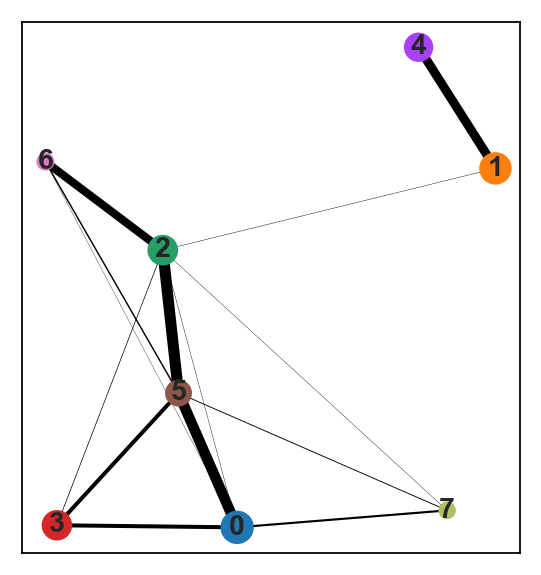

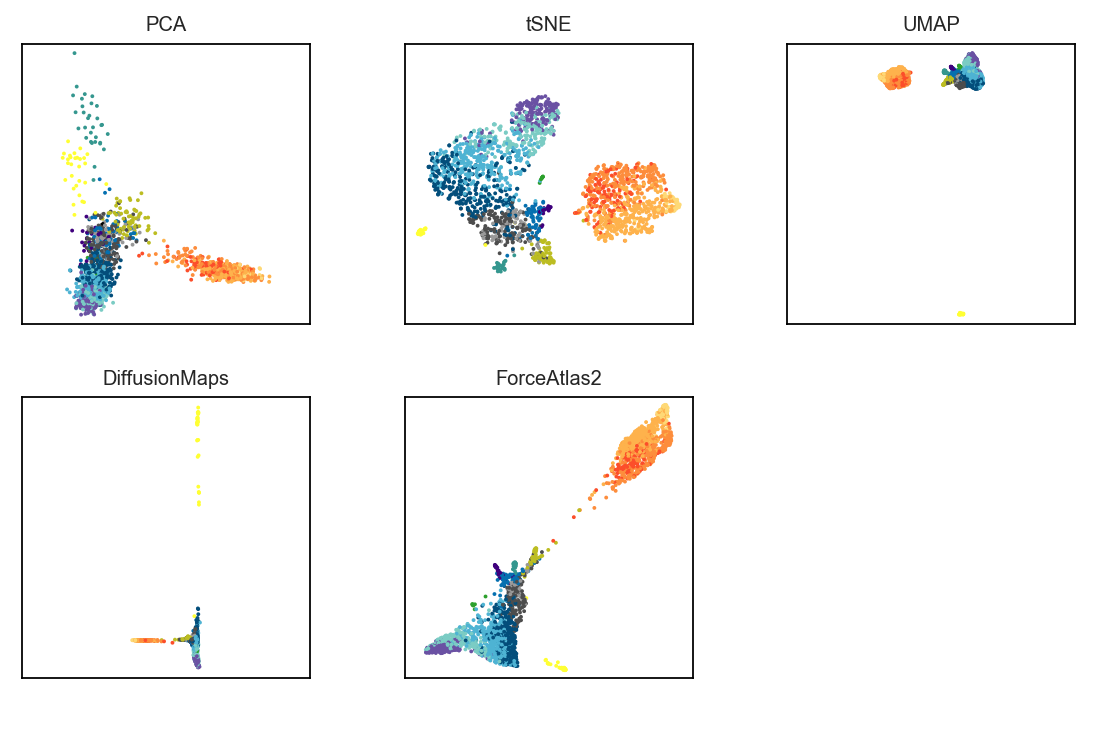

In [7]:
data_cut= data[idx_keep, :]
true_labels_cut = true_labels[idx_keep]
adata_cut, iroot_cut, louvain_labels_cut = init_scanpy(data_cut, col_names, 
                                                       'root', true_labels_cut, fout+'_cut'+class_to_remove, k=15, n_pcs=20)

plotBenchamrks(adata_cut, true_labels_cut, f"predictions/{model_name}_cut{class_to_remove}", coldict=color_dict)

In [10]:
for method in ['X_draw_graph_fa', 'X_umap']:
    df = pd.DataFrame(adata_cut.obsm[method], columns=['x1', 'x2'])
    fout_pred = f"predictions/{model_name}_wo_{class_to_remove}_{title_name_dict[method]}.csv"
    df.to_csv(fout_pred, index=False, sep=',')

In [76]:
print(f"datasets/{model_name}_wo_{class_to_remove}.csv")

datasets/Paul_wo_ery.csv


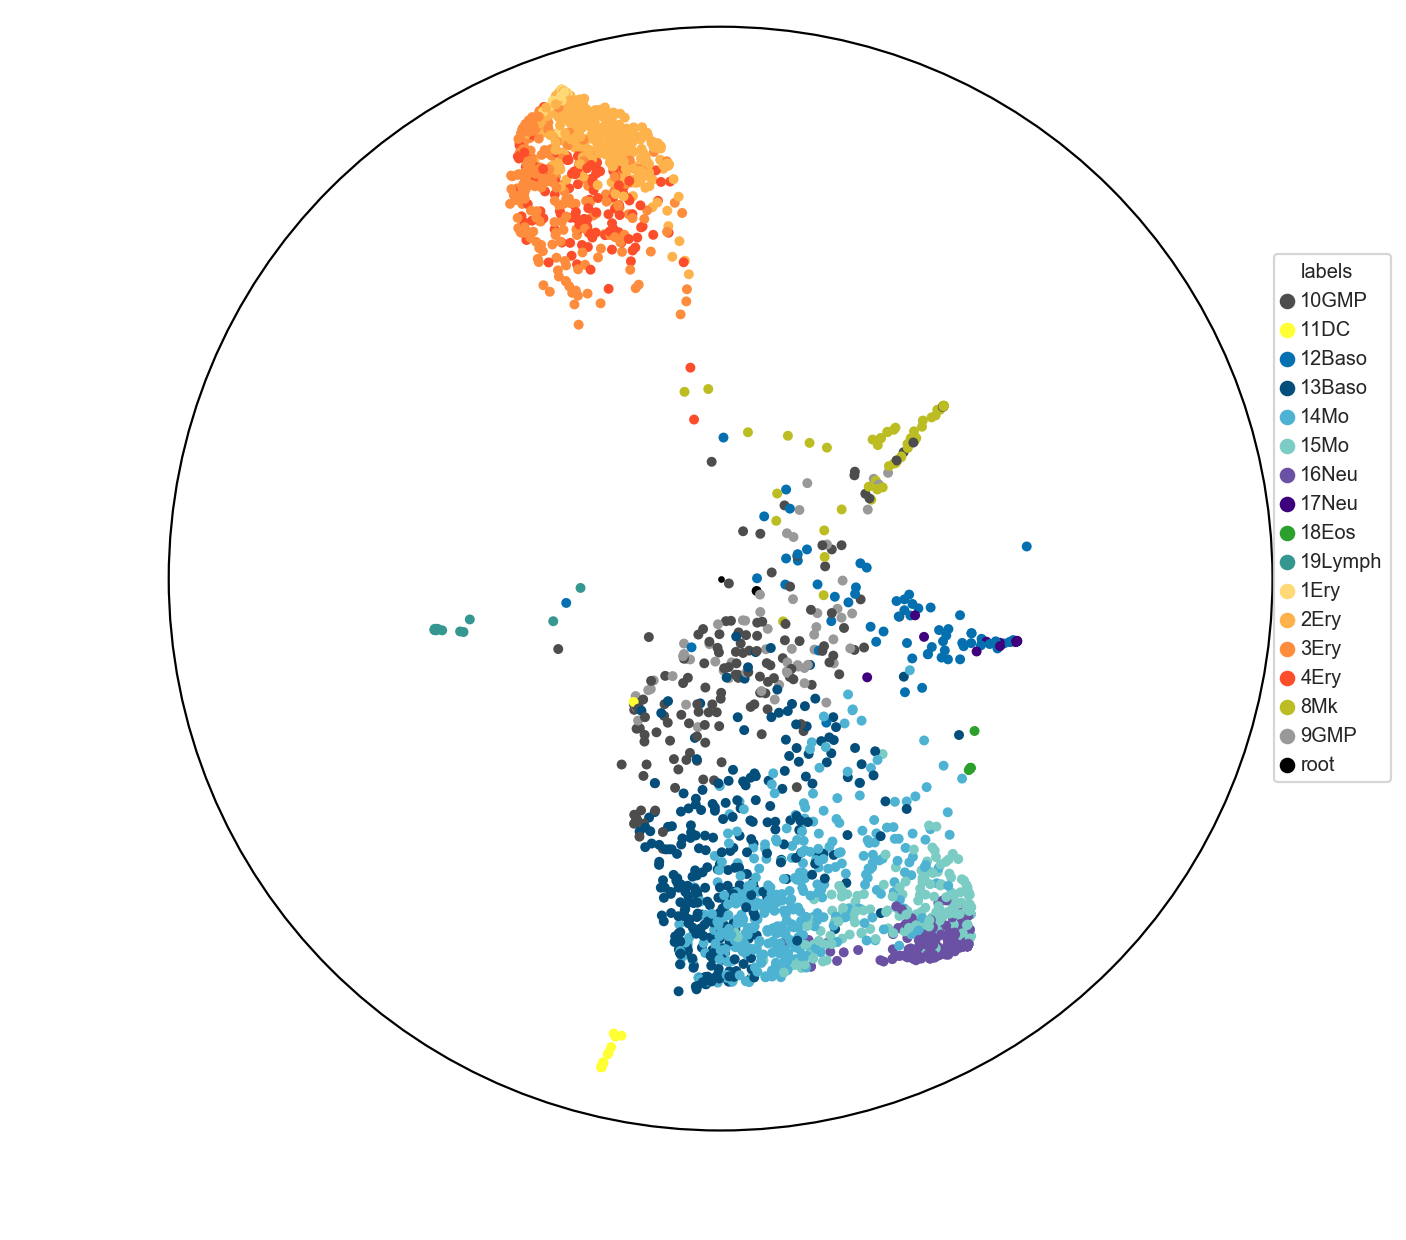

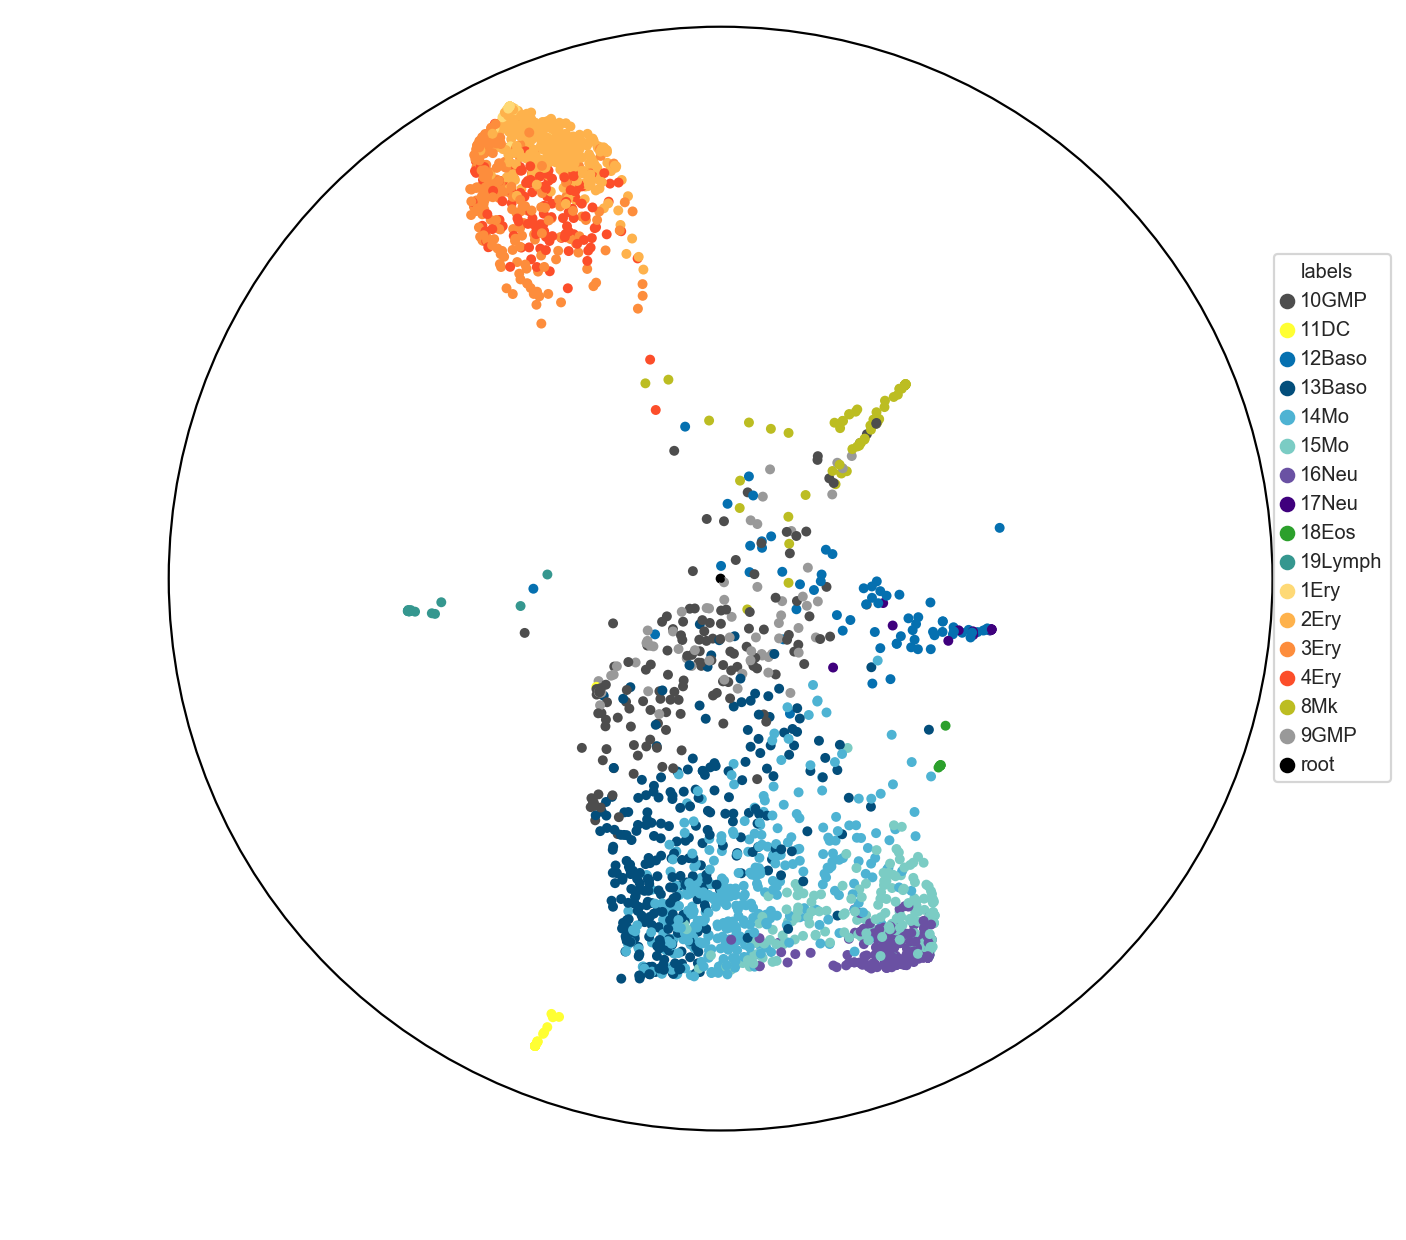

In [80]:
# fsetting = 'Paul_wo_10GMP_MFIsym15_klSym_sigma=2.00_gamma=2.00_lr=0.20_lrm=1.00_pca=20_epochs=5000_batchsize=322_connected'
# fsetting = 'Paul_wo_proj_MFIsym15_klSym_sigma=2.00_gamma=2.00_lr=0.18_lrm=1.00_pca=20_epochs=5000_batchsize=293_connected'
fsetting = 'Paul_wo_ery_MFIsym15_klSym_sigma=2.00_gamma=2.00_lr=0.10_lrm=0.10_pca=20_epochs=2000_batchsize=16_connected'

input_file = f"results/{fsetting}"
poincare_coord = pd.read_csv(input_file + '.csv', sep=',', header=None).values
model_cut = PoincareMaps(poincare_coord)
model_cut.plot('ori', labels=true_labels_cut, file_name=fout + '_ori_cut' + class_to_remove, 
           title_name='Poincaré map', zoom=None, bbox=(1.1, 0.8), coldict=color_dict, d1=4.5*2, d2=4.0*2)
model_cut.iroot = iroot_cut
model_cut.rotate()
model_cut.plot('rot', labels=true_labels_cut, file_name=fout + '_rotated_cut' + class_to_remove, 
           title_name='clusters', zoom=None, show=True, bbox=(1.1, 0.8), coldict=color_dict, d1=4.5*2, d2=4.0*2)

df = pd.DataFrame(model_cut.coordinates, columns=['x1', 'x2'])
fout_pred = f"predictions/{model_name}_wo_{class_to_remove}_PM.csv"
df.to_csv(fout_pred, index=False, sep=',')

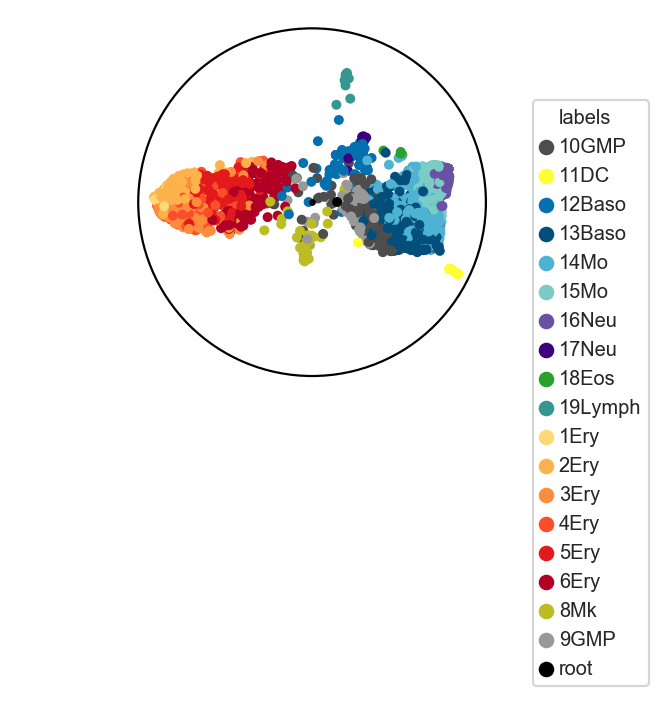

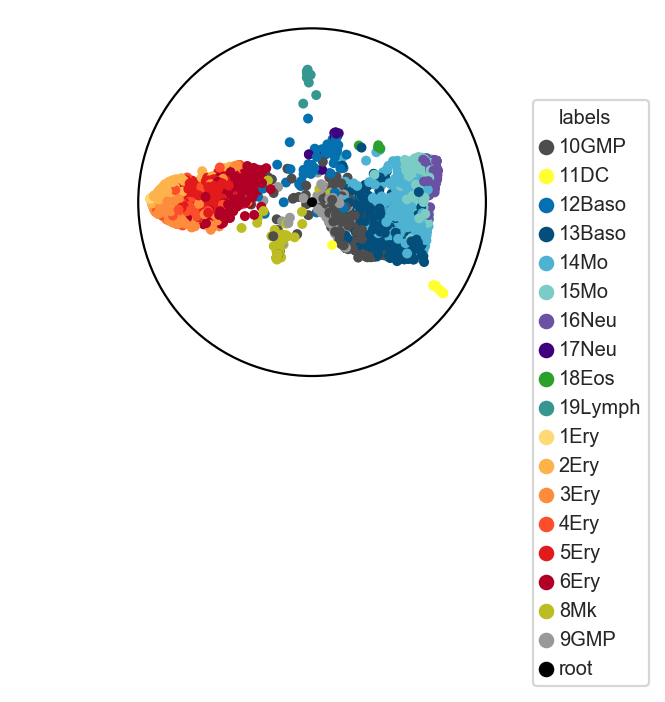

In [32]:
fsetting = 'Paul_wo_7MEP_MFIsym15_klSym_sigma=2.00_gamma=2.00_lr=0.20_lrm=1.00_pca=20_epochs=5000_batchsize=320_connected'
input_file = f"results/{fsetting}"
poincare_coord = pd.read_csv(input_file + '.csv', sep=',', header=None).values
model_cut = PoincareMaps(poincare_coord)
model_cut.plot('ori', labels=true_labels_cut, file_name=fout + '_ori_cut' + class_to_remove, 
           title_name='Poincaré map', zoom=None, bbox=(1.1, 0.8), coldict=color_dict, d1=4.5*2, d2=4.0*2)
model_cut.iroot = iroot_cut
model_cut.rotate()
model_cut.plot('rot', labels=true_labels_cut, file_name=fout + '_rotated_cut' + class_to_remove, 
           title_name='clusters', zoom=None, show=True, bbox=(1.1, 0.8), coldict=color_dict)

df = pd.DataFrame(model_cut.coordinates_rotated, columns=['x1', 'x2'])
fout_pred = f"predictions/{model_name}_wo_{class_to_remove}_PM.csv"
df.to_csv(fout_pred, index=False, sep=',')

# Planaria

In [3]:
model_name = 'Planaria'
col_dict = None

fin = f"datasets/{model_name}"
fout = f"predictions/{model_name}"

data, true_labels, col_names = read_data(fin, normalize=False, n_pca=0)
# adata, iroot, louvain_labels = init_scanpy(data, col_names, 'neoblast 1', true_labels, fout, k=20, n_pcs=0)

# plotBenchamrks(adata, louvain_labels, f"predictions/{model_name}_louvain", pl_size=4.4)
# plotBenchamrks(adata, true_labels, f"predictions/{model_name}", coldict=color_dict, pl_size=4.4)

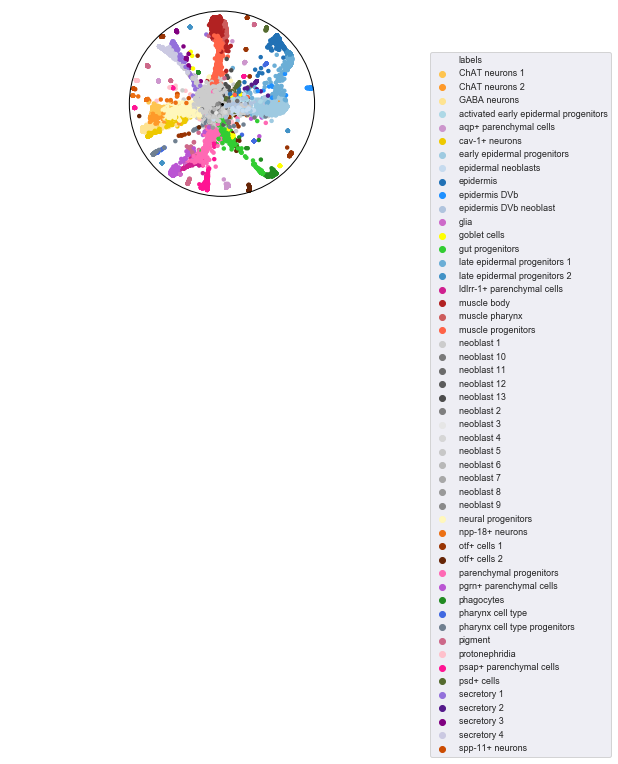

In [4]:
fsetting = 'Planaria_MFIsym15_klSym_sigma=2.00_gamma=2.00_lr=1.25_lrm=1.00_pca=0_epochs=10000_batchsize=2000_connected'
input_file = f"results/{fsetting}"
poincare_coord = pd.read_csv(input_file + '.csv', sep=',', header=None).values
model = PoincareMaps(poincare_coord)
model.plot('ori', labels=true_labels, file_name=fout + '_ori', 
           title_name='Poincaré map', zoom=None, bbox=(1.1, 0.8), coldict=color_dict, d1=4.5*2, d2=4.0*2)
# model.iroot = iroot
# model.rotate()
# model.plot('rot', labels=true_labels, file_name=fout + '_rotated', 
#            title_name='clusters', zoom=None, show=True, bbox=(1.1, 0.8), 
#            coldict=color_dict, d1=4.5*2, d2=4.0*2)


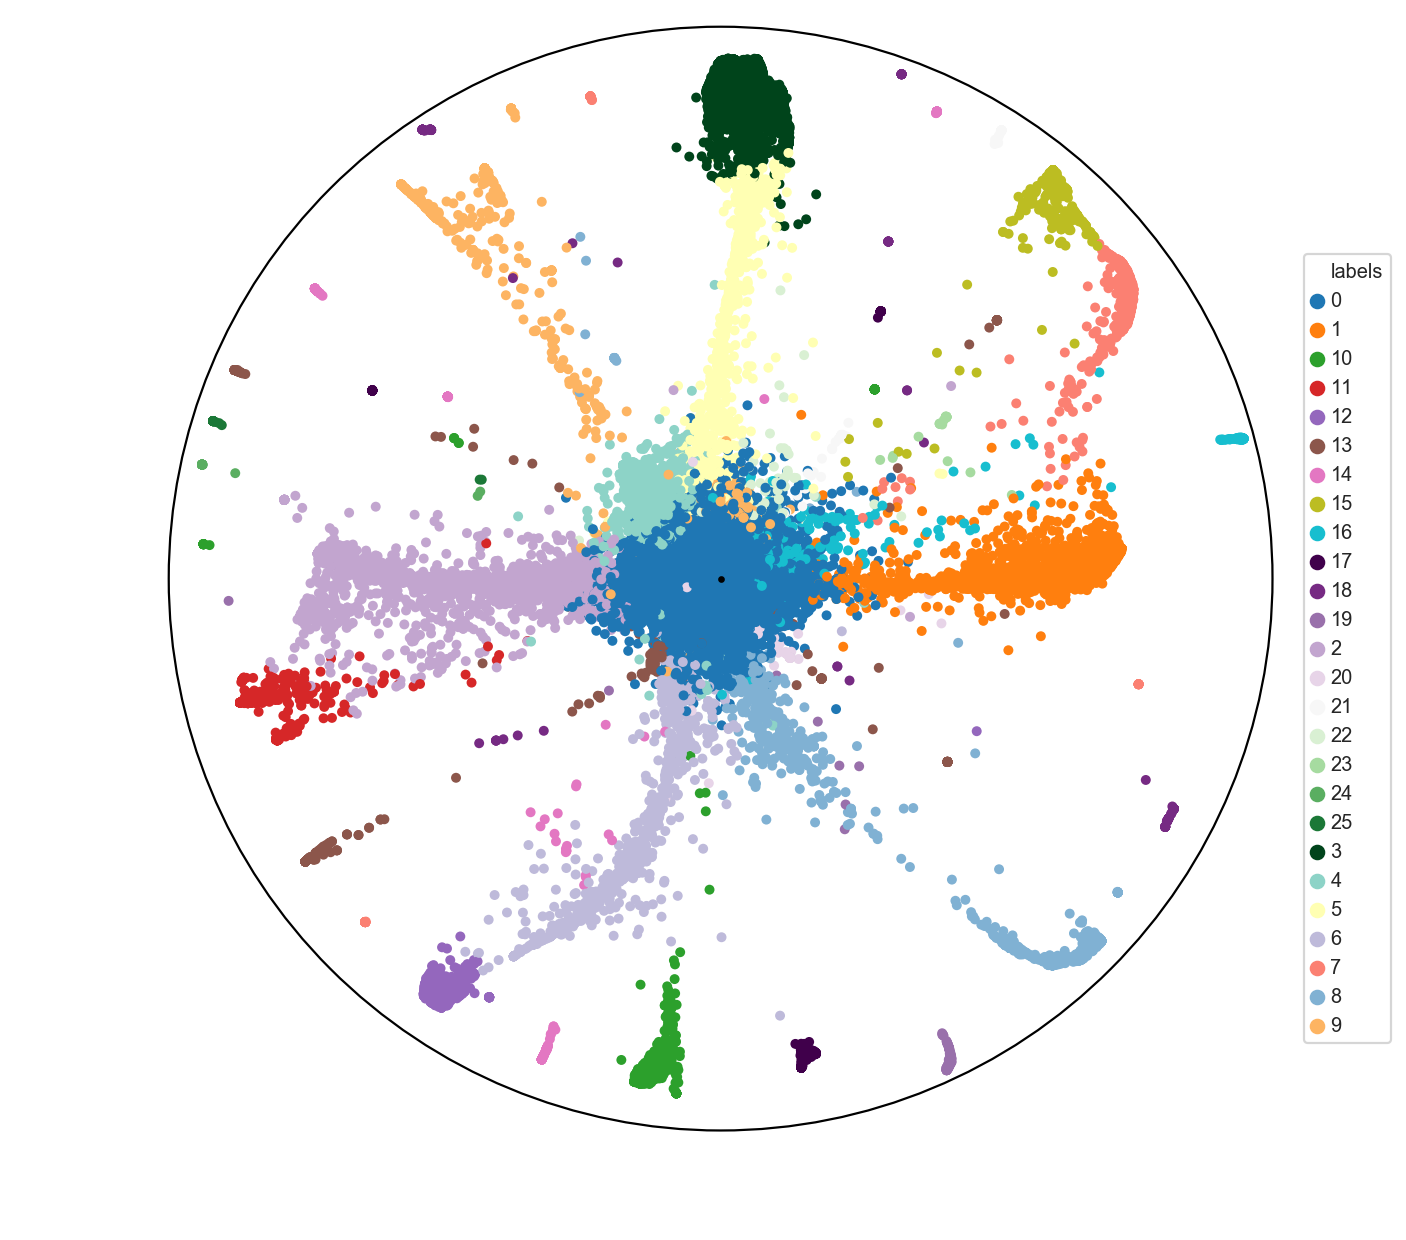

In [19]:
model.plot('rot', labels=louvain_labels, file_name=fout + '_louvain_labels', 
           title_name='clusters', zoom=None, show=True, bbox=(1.1, 0.8), 
           d1=4.5*2, d2=4.0*2)


In [20]:
np.unique(true_labels)

array(['ChAT neurons 1', 'ChAT neurons 2', 'GABA neurons',
       'activated early epidermal progenitors', 'aqp+ parenchymal cells',
       'cav-1+ neurons', 'early epidermal progenitors',
       'epidermal neoblasts', 'epidermis', 'epidermis DVb',
       'epidermis DVb neoblast', 'glia', 'goblet cells',
       'gut progenitors', 'late epidermal progenitors 1',
       'late epidermal progenitors 2', 'ldlrr-1+ parenchymal cells',
       'muscle body', 'muscle pharynx', 'muscle progenitors',
       'neoblast 1', 'neoblast 10', 'neoblast 11', 'neoblast 12',
       'neoblast 13', 'neoblast 2', 'neoblast 3', 'neoblast 4',
       'neoblast 5', 'neoblast 6', 'neoblast 7', 'neoblast 8',
       'neoblast 9', 'neural progenitors', 'npp-18+ neurons',
       'otf+ cells 1', 'otf+ cells 2', 'parenchymal progenitors',
       'pgrn+ parenchymal cells', 'phagocytes', 'pharynx cell type',
       'pharynx cell type progenitors', 'pigment', 'protonephridia',
       'psap+ parenchymal cells', 'psd+ cells'

In [5]:
r = np.sqrt(model.coordinates_rotated[:,0]**2 + model.coordinates_rotated[:,1]**2)

AttributeError: 'PoincareMaps' object has no attribute 'coordinates_rotated'

In [40]:
idx_keep = np.where( ((true_labels != 'parenchymal progenitors') | (r < 0.5)))[0]

# idx_keep = np.where( 
#                     (true_labels != 'early epidermal progenitors') &
#                     (true_labels != '5Ery') &
#                     (true_labels != '7MEP'))[0]

# (true_labels != '10GMP') & 
#                     (true_labels != '9GMP') &
class_to_remove = 'pp'


In [45]:
df = pd.DataFrame(data[idx_keep, :], columns=col_names)
df['labels'] = true_labels[idx_keep]

df.to_csv(f"datasets/{model_name}_wo_{class_to_remove}.csv", index=False, sep=',')

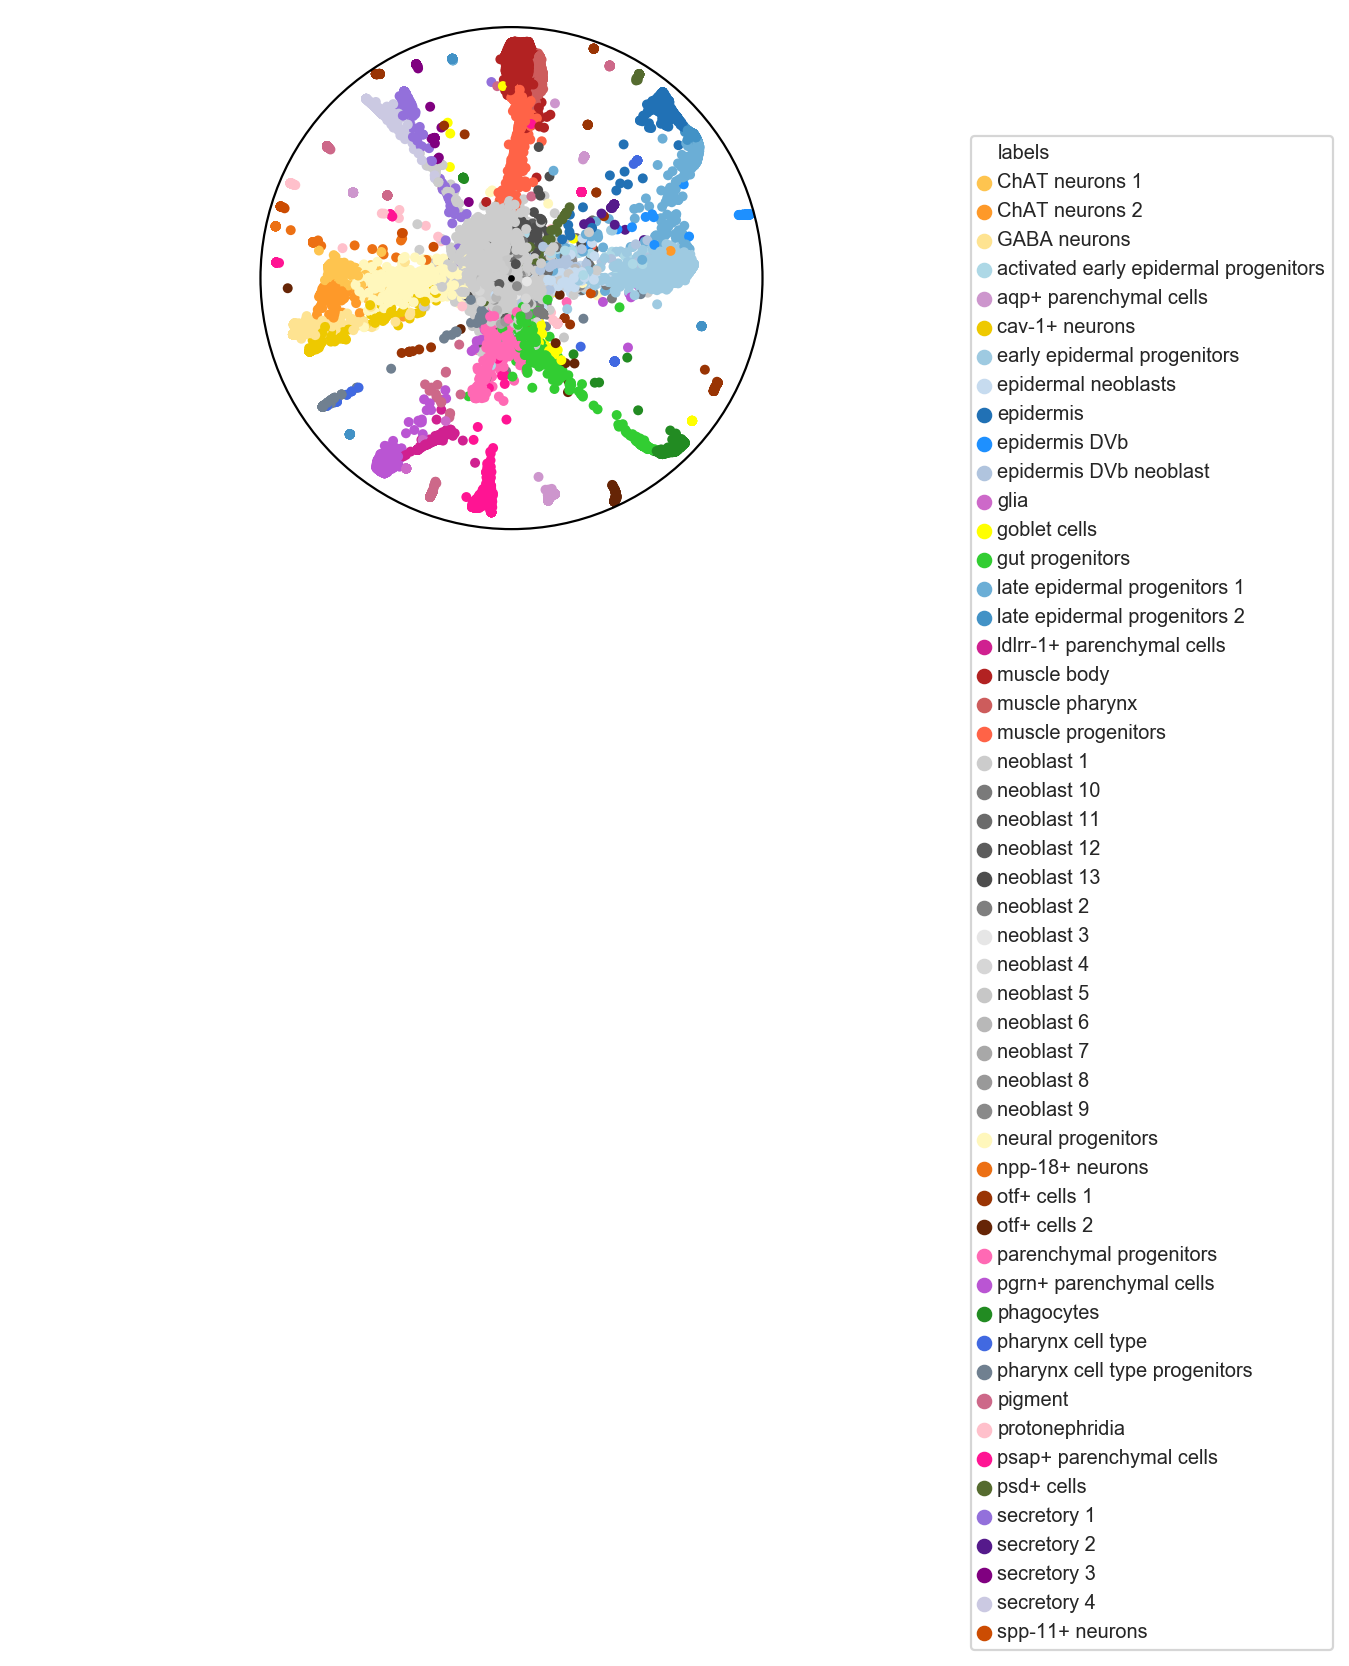

In [41]:
model_cut_est = PoincareMaps(model.coordinates_rotated[idx_keep, :])
model_cut_est.plot('ori', labels=true_labels[idx_keep], file_name=None, 
           title_name='Poincaré map', zoom=None, bbox=(1.1, 0.8),
                   coldict=color_dict, d1=4.5*2, d2=4.0*2)


In [ ]:
data_cut= data[idx_keep, :]
true_labels_cut = true_labels[idx_keep]

... storing 'labels' as categorical


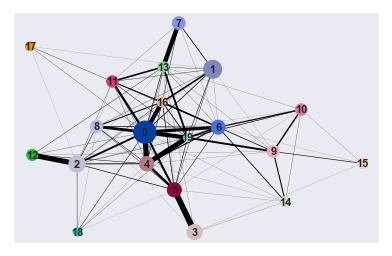

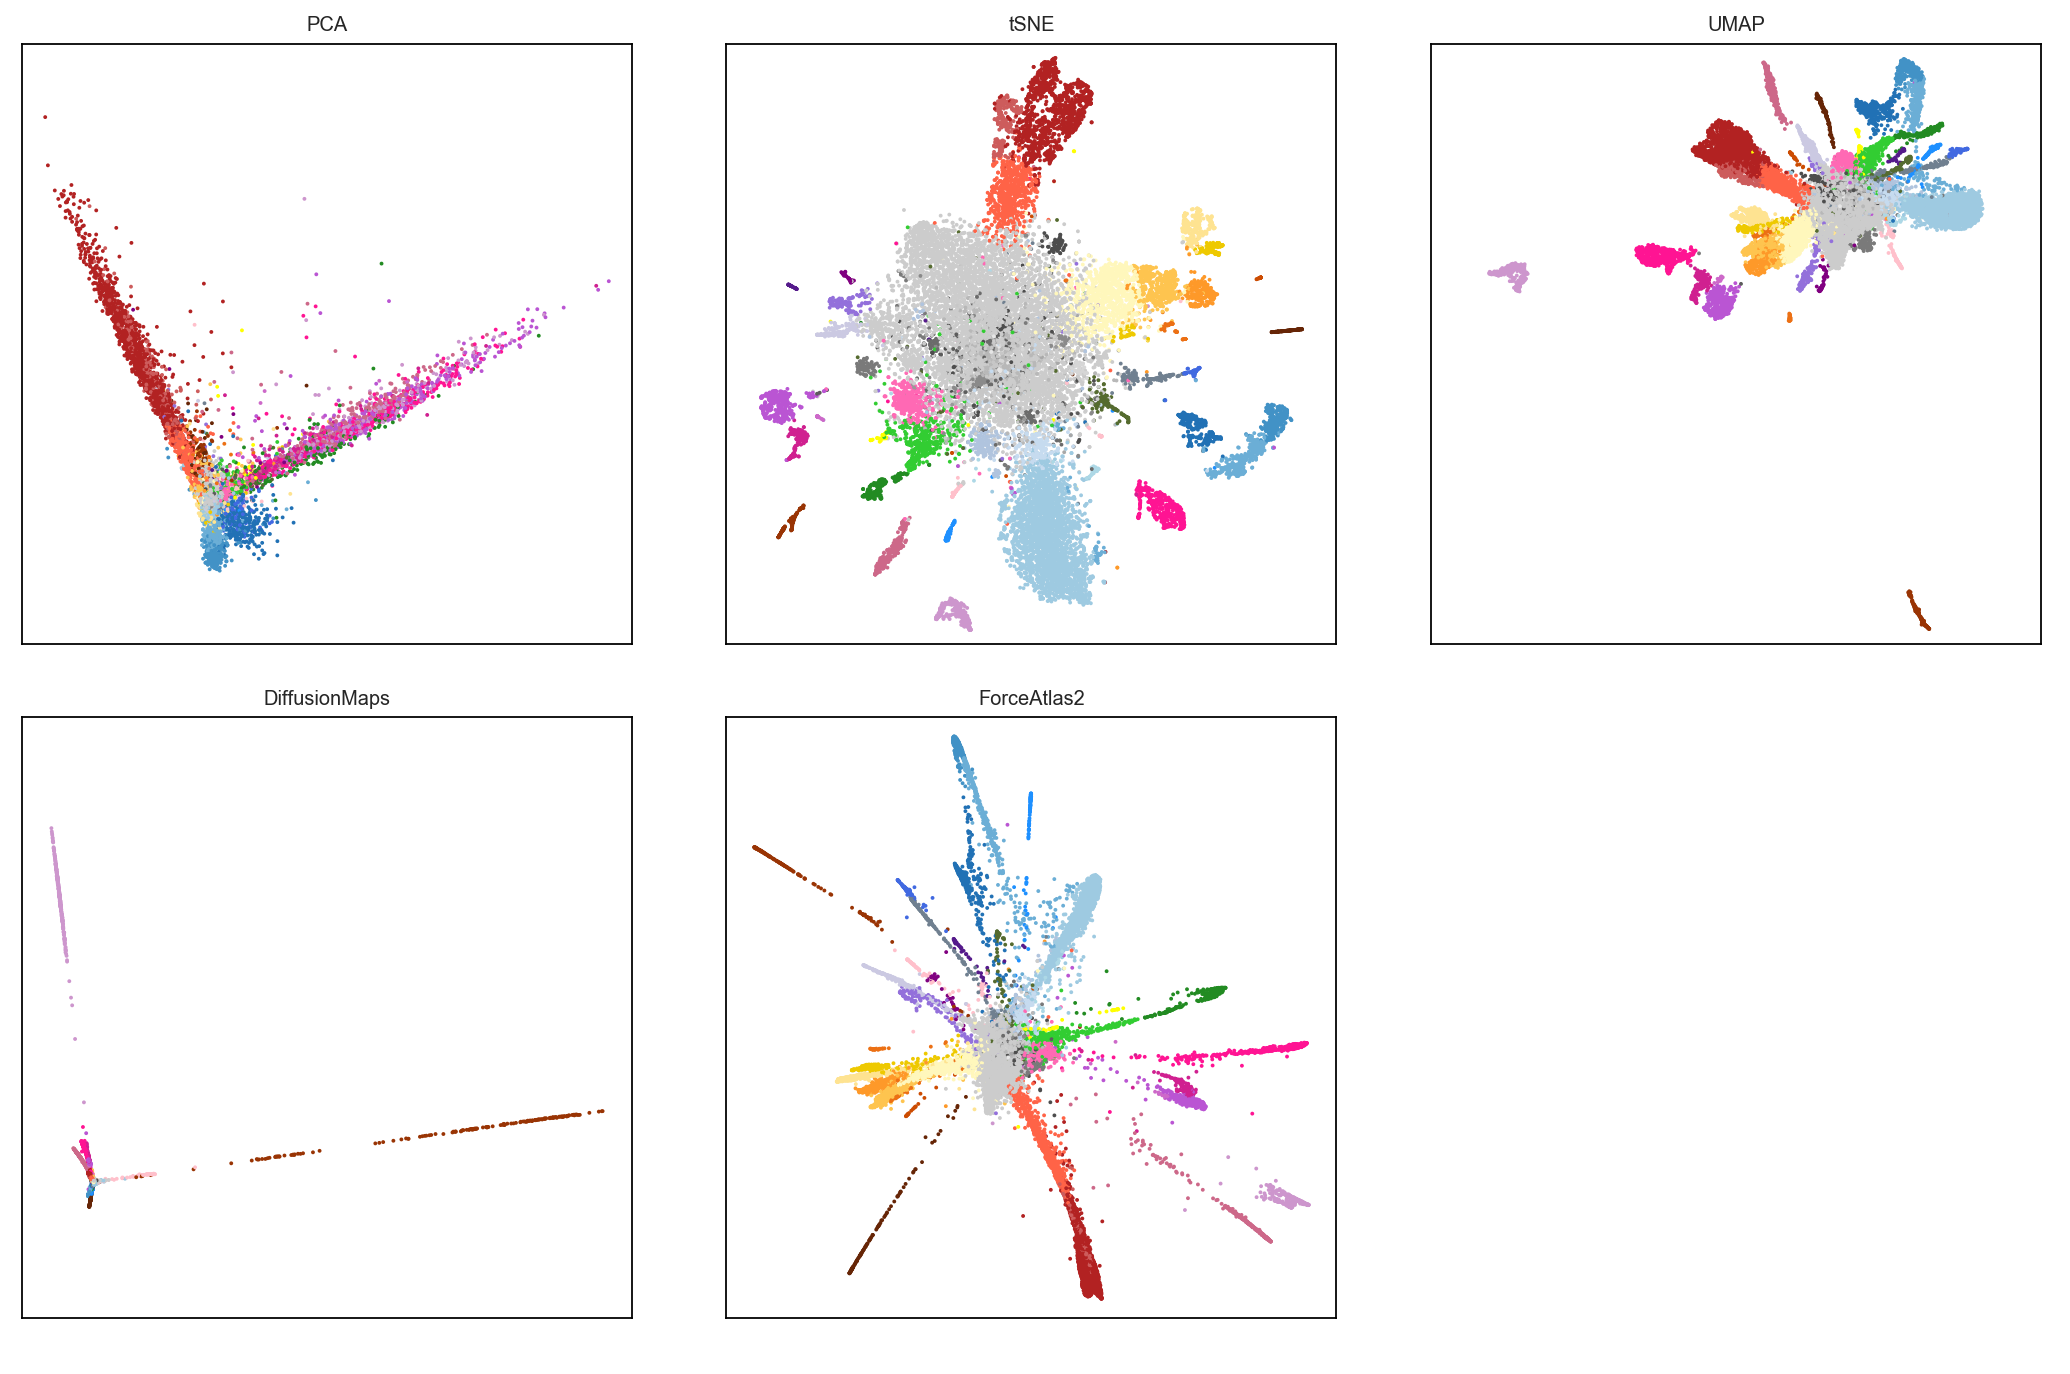

In [19]:
adata_cut, iroot_cut, louvain_labels_cut = init_scanpy(data_cut, col_names, 
                                                       'neoblast 1', true_labels_cut, 
                                                       fout+'_cut'+class_to_remove, k=30, n_pcs=0)

plotBenchamrks(adata_cut, true_labels_cut, 
               f"predictions/{model_name}_cut{class_to_remove}", 
               coldict=color_dict, pl_size=4.4)

In [22]:
for method in ['X_draw_graph_fa', 'X_umap']:
    df = pd.DataFrame(adata_cut.obsm[method], columns=['x1', 'x2'])
    fout_pred = f"predictions/{model_name}_wo_{class_to_remove}_{title_name_dict[method]}.csv"
    df.to_csv(fout_pred, index=False, sep=',')

In [14]:
class_to_remove = 'pp'
data_cut, true_labels_cut, col_names = read_data(f"datasets/{model_name}_wo_{class_to_remove}", 
                                                 normalize=False, n_pca=0)


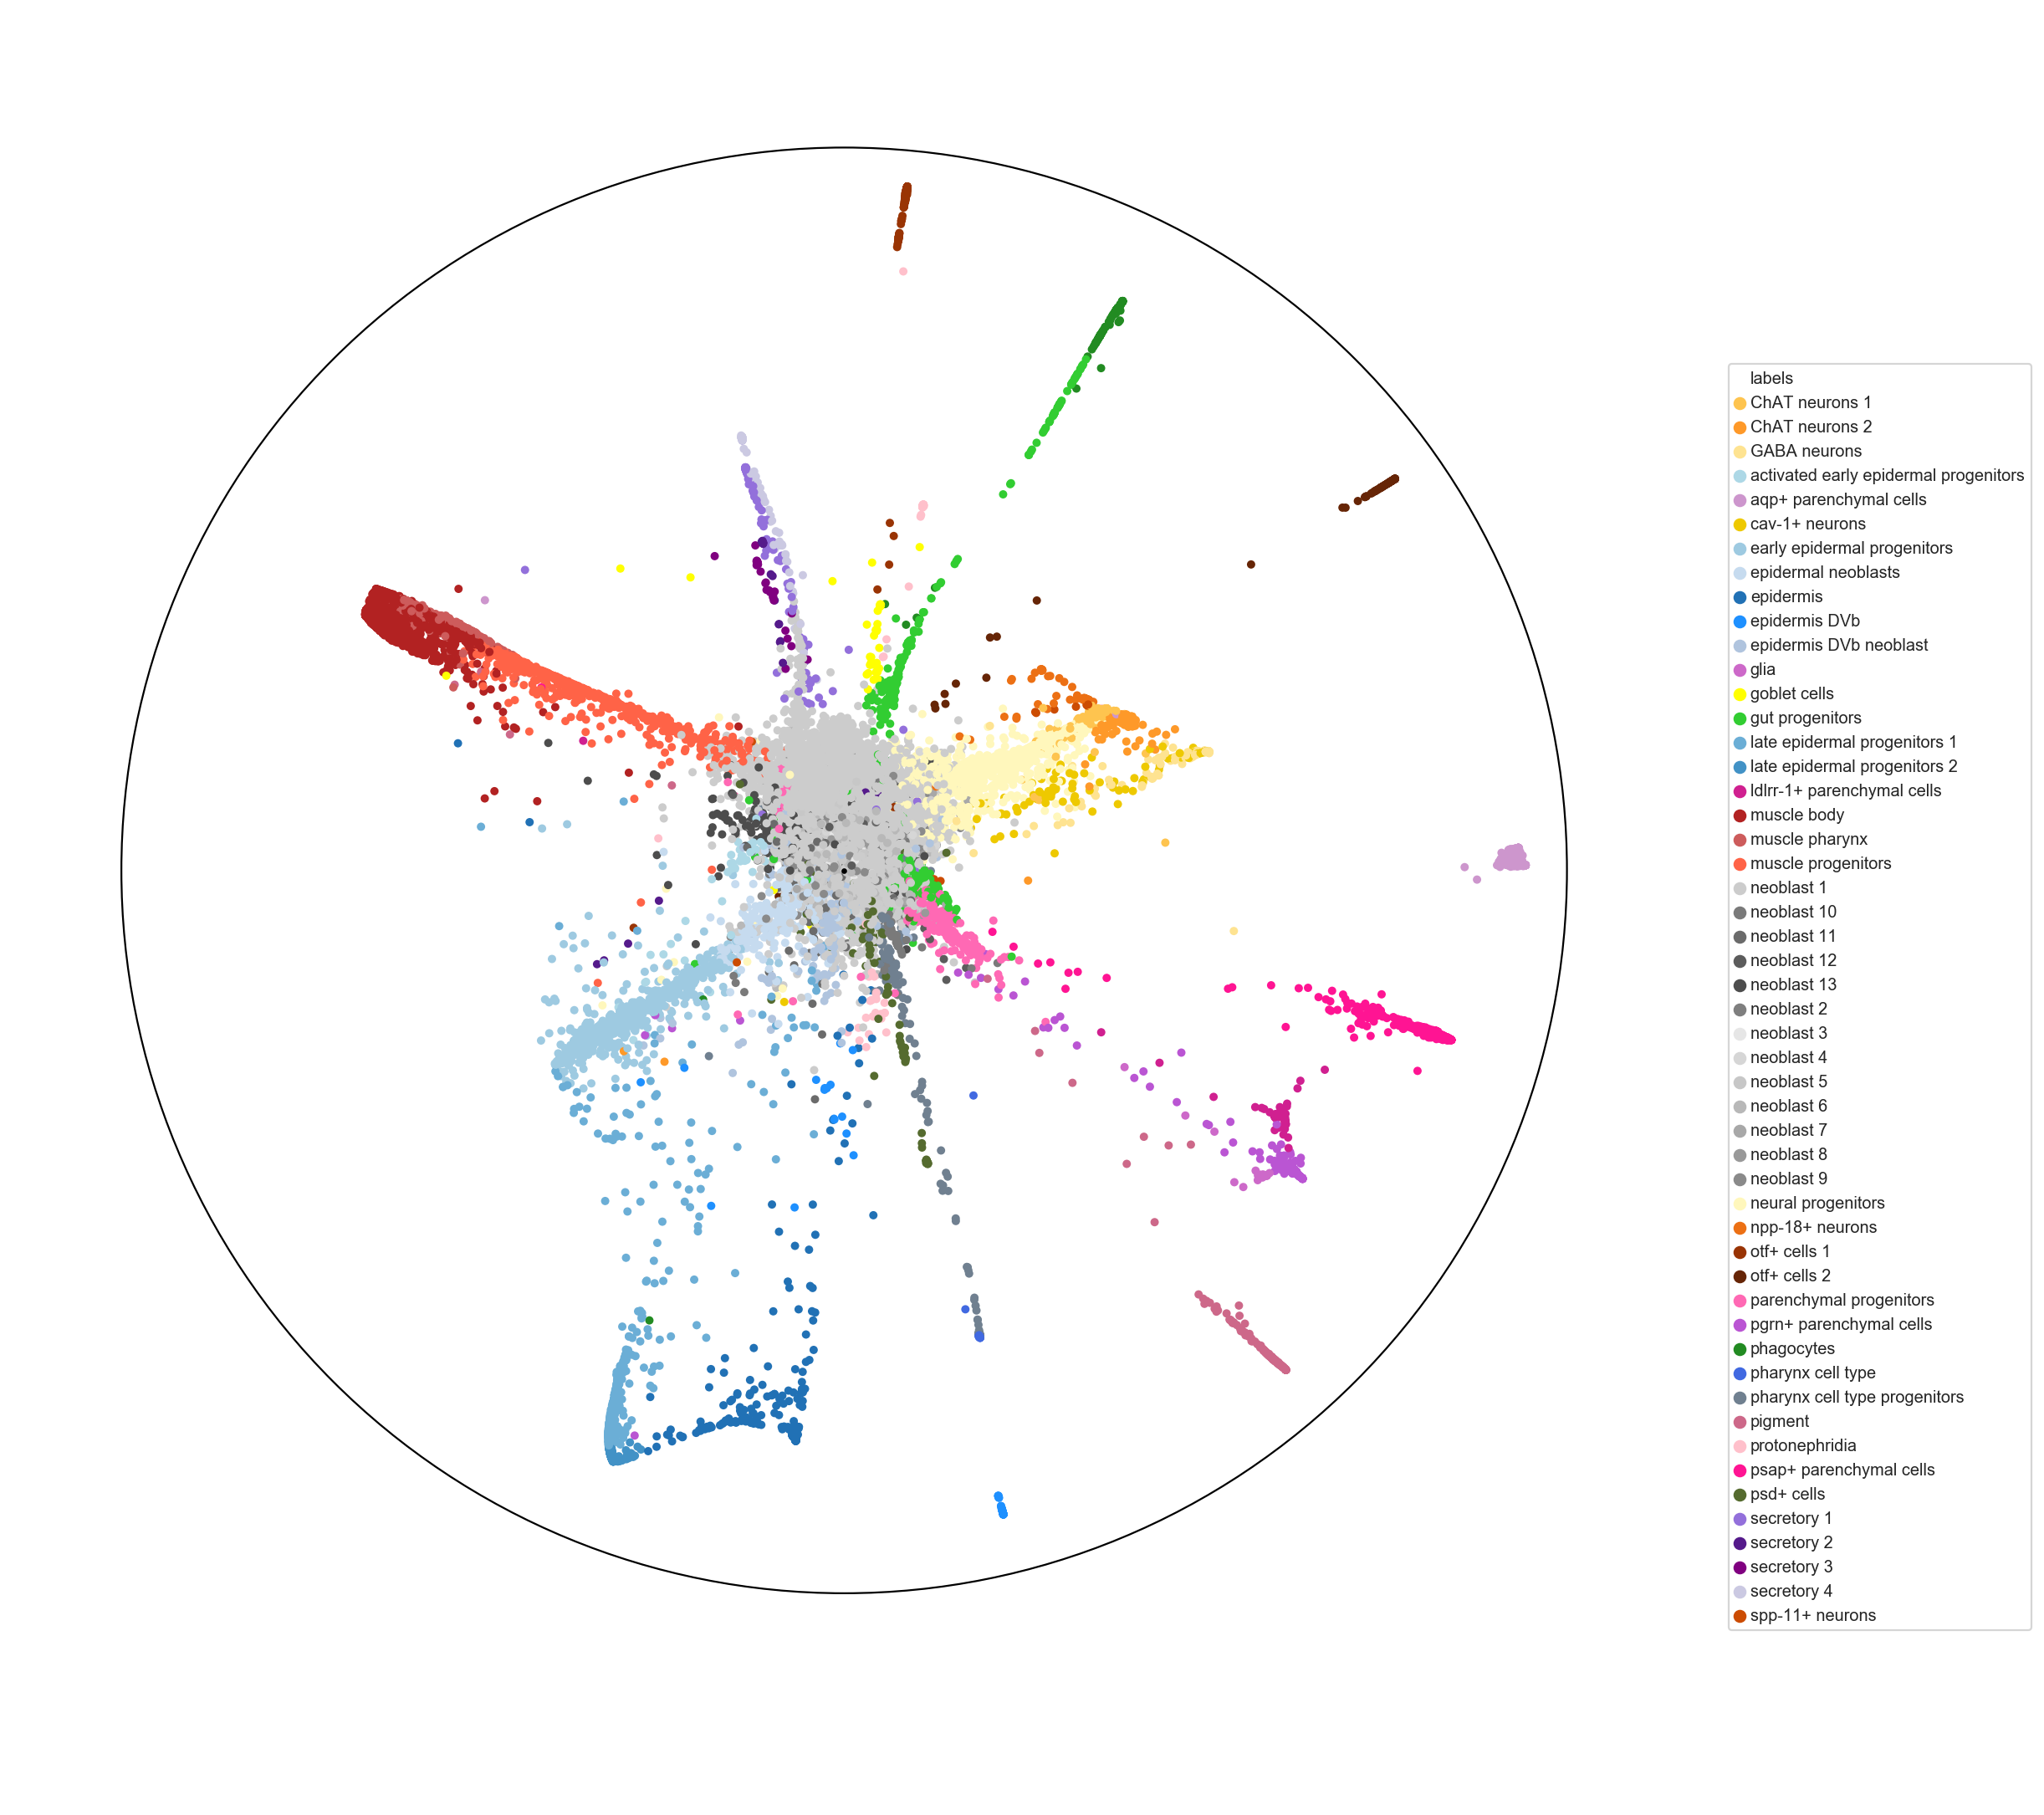

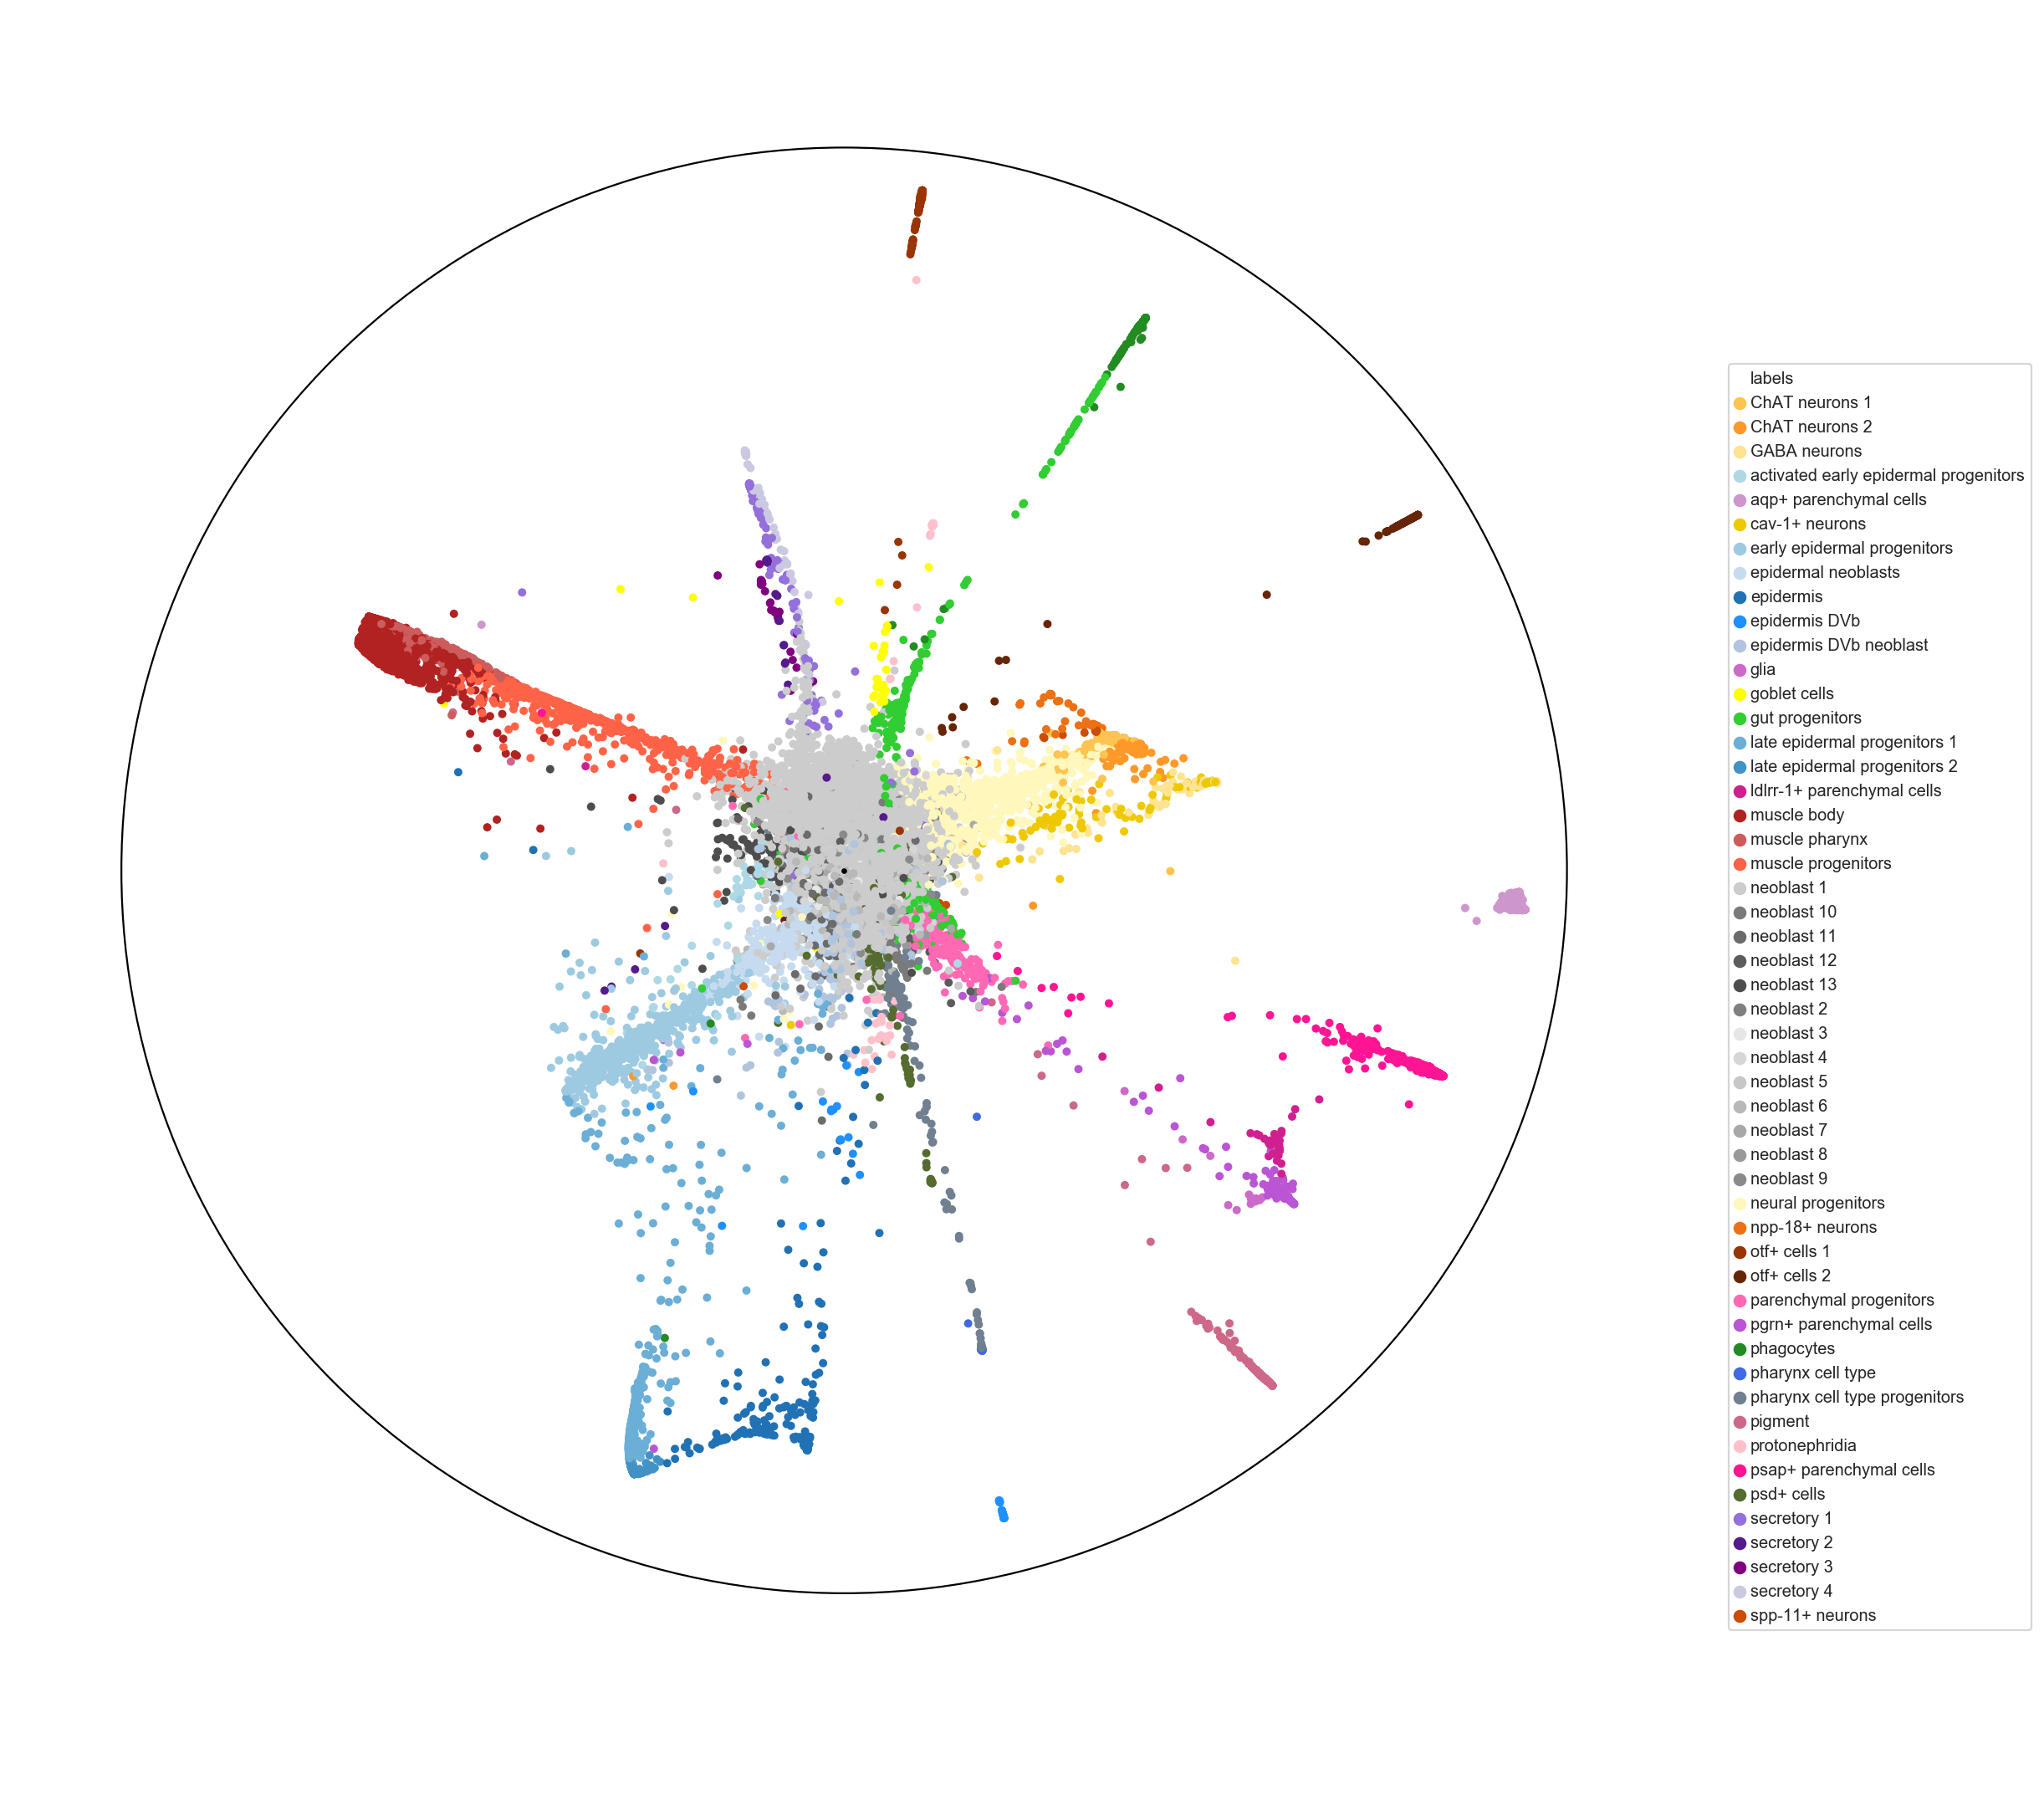

In [24]:
# fsetting = 'Planaria_wo_lep1_MFIsym20_klSym_sigma=2.00_gamma=2.00_lr=0.40_lrm=1.00_pca=0_epochs=2000_batchsize=64_connected'
# fsetting = 'Planaria_wo_pp_MFIsym20_klSym_sigma=2.00_gamma=2.00_lr=0.40_lrm=1.00_pca=0_epochs=2000_batchsize=64_connected'
fsetting = 'Planaria_wo_pp_MFIsym30_klSym_sigma=2.00_gamma=2.00_lr=0.40_lrm=1.00_pca=0_epochs=2000_batchsize=64_connected'

input_file = f"results/{fsetting}"
poincare_coord = pd.read_csv(input_file + '.csv', sep=',', header=None).values
model_cut = PoincareMaps(poincare_coord)
model_cut.plot('ori', labels=true_labels_cut, file_name=fout + '_ori_cut' + class_to_remove, 
           title_name='Poincaré map', zoom=None, bbox=(1.1, 0.8), coldict=color_dict, d1=4.5*3.5, d2=4.0*3.5)
model_cut.iroot = iroot_cut
model_cut.rotate()
model_cut.plot('rot', labels=true_labels_cut, file_name=fout + '_rotated_cut' + class_to_remove, 
           title_name='clusters', zoom=None, show=True, bbox=(1.1, 0.8), coldict=color_dict, d1=4.5*3.5, d2=4.0*3.5)

df = pd.DataFrame(model_cut.coordinates, columns=['x1', 'x2'])
fout_pred = f"predictions/{model_name}_wo_{class_to_remove}_PM.csv"
df.to_csv(fout_pred, index=False, sep=',')


In [25]:
df = pd.DataFrame(model_cut.coordinates_rotated, columns=['x1', 'x2'])
fout_pred = f"predictions/{model_name}_wo_{class_to_remove}_PM.csv"
df.to_csv(fout_pred, index=False, sep=',')